## 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?
## 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
- 분석을 통해 가설을 검정해 봅니다.
## 3. 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn을 불러옵니다.
# 또, 구 버전의 주피터 노트북에서는 %matplotlib inline 설정이 되어야 노트북 안에서 그래프를 시각화 합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 4. 한글 폰트 설정

In [2]:
# Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# 로컬 아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# 나굼고딕 설치

plt.rc('font', family='AppleGothic')

In [3]:
# 한글포트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보입니다.
# 한글이 출력될 수 있도록 폰트 설정을 해줍니다.
# 운영체제별 설정을 위해 로드합니다.
import os

print(os.name)

if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('axes', unicode_minus=False)

posix


In [4]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format ='retina'

## 5. 데이터 불러오기
- 건강검진정보란 2002년부터 2013년까지의 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만 40세와 만 66세에 도달한 이들이 받게 되는 생애전환기 건강검진진당 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터이다.

공공데이터 개방서비스(http://nhiss.nhis.or.kr/op/it/index.do)에서도 다운로드 받을 수 있음.

- 건강검진정보(2017) 다운로드 받기 : https://www.data.go.kr/dataset/15007122/fileData.do

In [5]:
# 다운로드 받은 파일을 판다스의 read_csv를 통해 읽어옵니다.
# 파일을 읽어온 후 shape로 행과 열의 수를 출력합니다.
# encoding='cp949' : csv file의 line수가 2^16승 즉 65536이상이 되어 error 발생될 시 사용
df = pd.read_csv('./data/NHIS_OPEN_GJ_2017_v1.1.csv', encoding='cp949')
df.shape

(1000000, 34)

### 5.1 미리보기

In [6]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.sample(n=3)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
856816,2017,856817,2,13,11,150,65,84.0,0.4,0.7,...,15.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
797348,2017,797349,1,10,41,170,70,87.0,0.9,0.9,...,36.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
243985,2017,243986,1,11,42,160,55,71.0,0.8,0.7,...,48.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


In [7]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
3,2017,4,1,11,48,175,80,91.0,1.5,1.2,...,18.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26
4,2017,5,1,11,30,165,60,80.0,1.0,1.2,...,25.0,1.0,N,Y,NaN,NaN,NaN,NaN,N,2018-11-26


In [8]:
df.tail(3)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
999997,2017,999998,2,9,26,155,50,68.0,1.0,0.7,...,17.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999998,2017,999999,1,6,29,175,60,72.0,1.5,1.0,...,17.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
999999,2017,1000000,1,11,41,160,70,90.5,1.0,1.5,...,36.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


## 6 기본정보 보기

In [9]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량등을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [10]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [11]:
# dtypes를 통해 데이터 형식만 출력
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

## 7 결측치 보기

In [12]:
True == 1

True

In [13]:
# isnull 을 통해 결측치를 bool 값으료 표시하고 sum을 하면 컬럼마다의 결측치 수를 세어줍니다.
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

In [14]:
# isna로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 세어봅니다.
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

<Axes: >

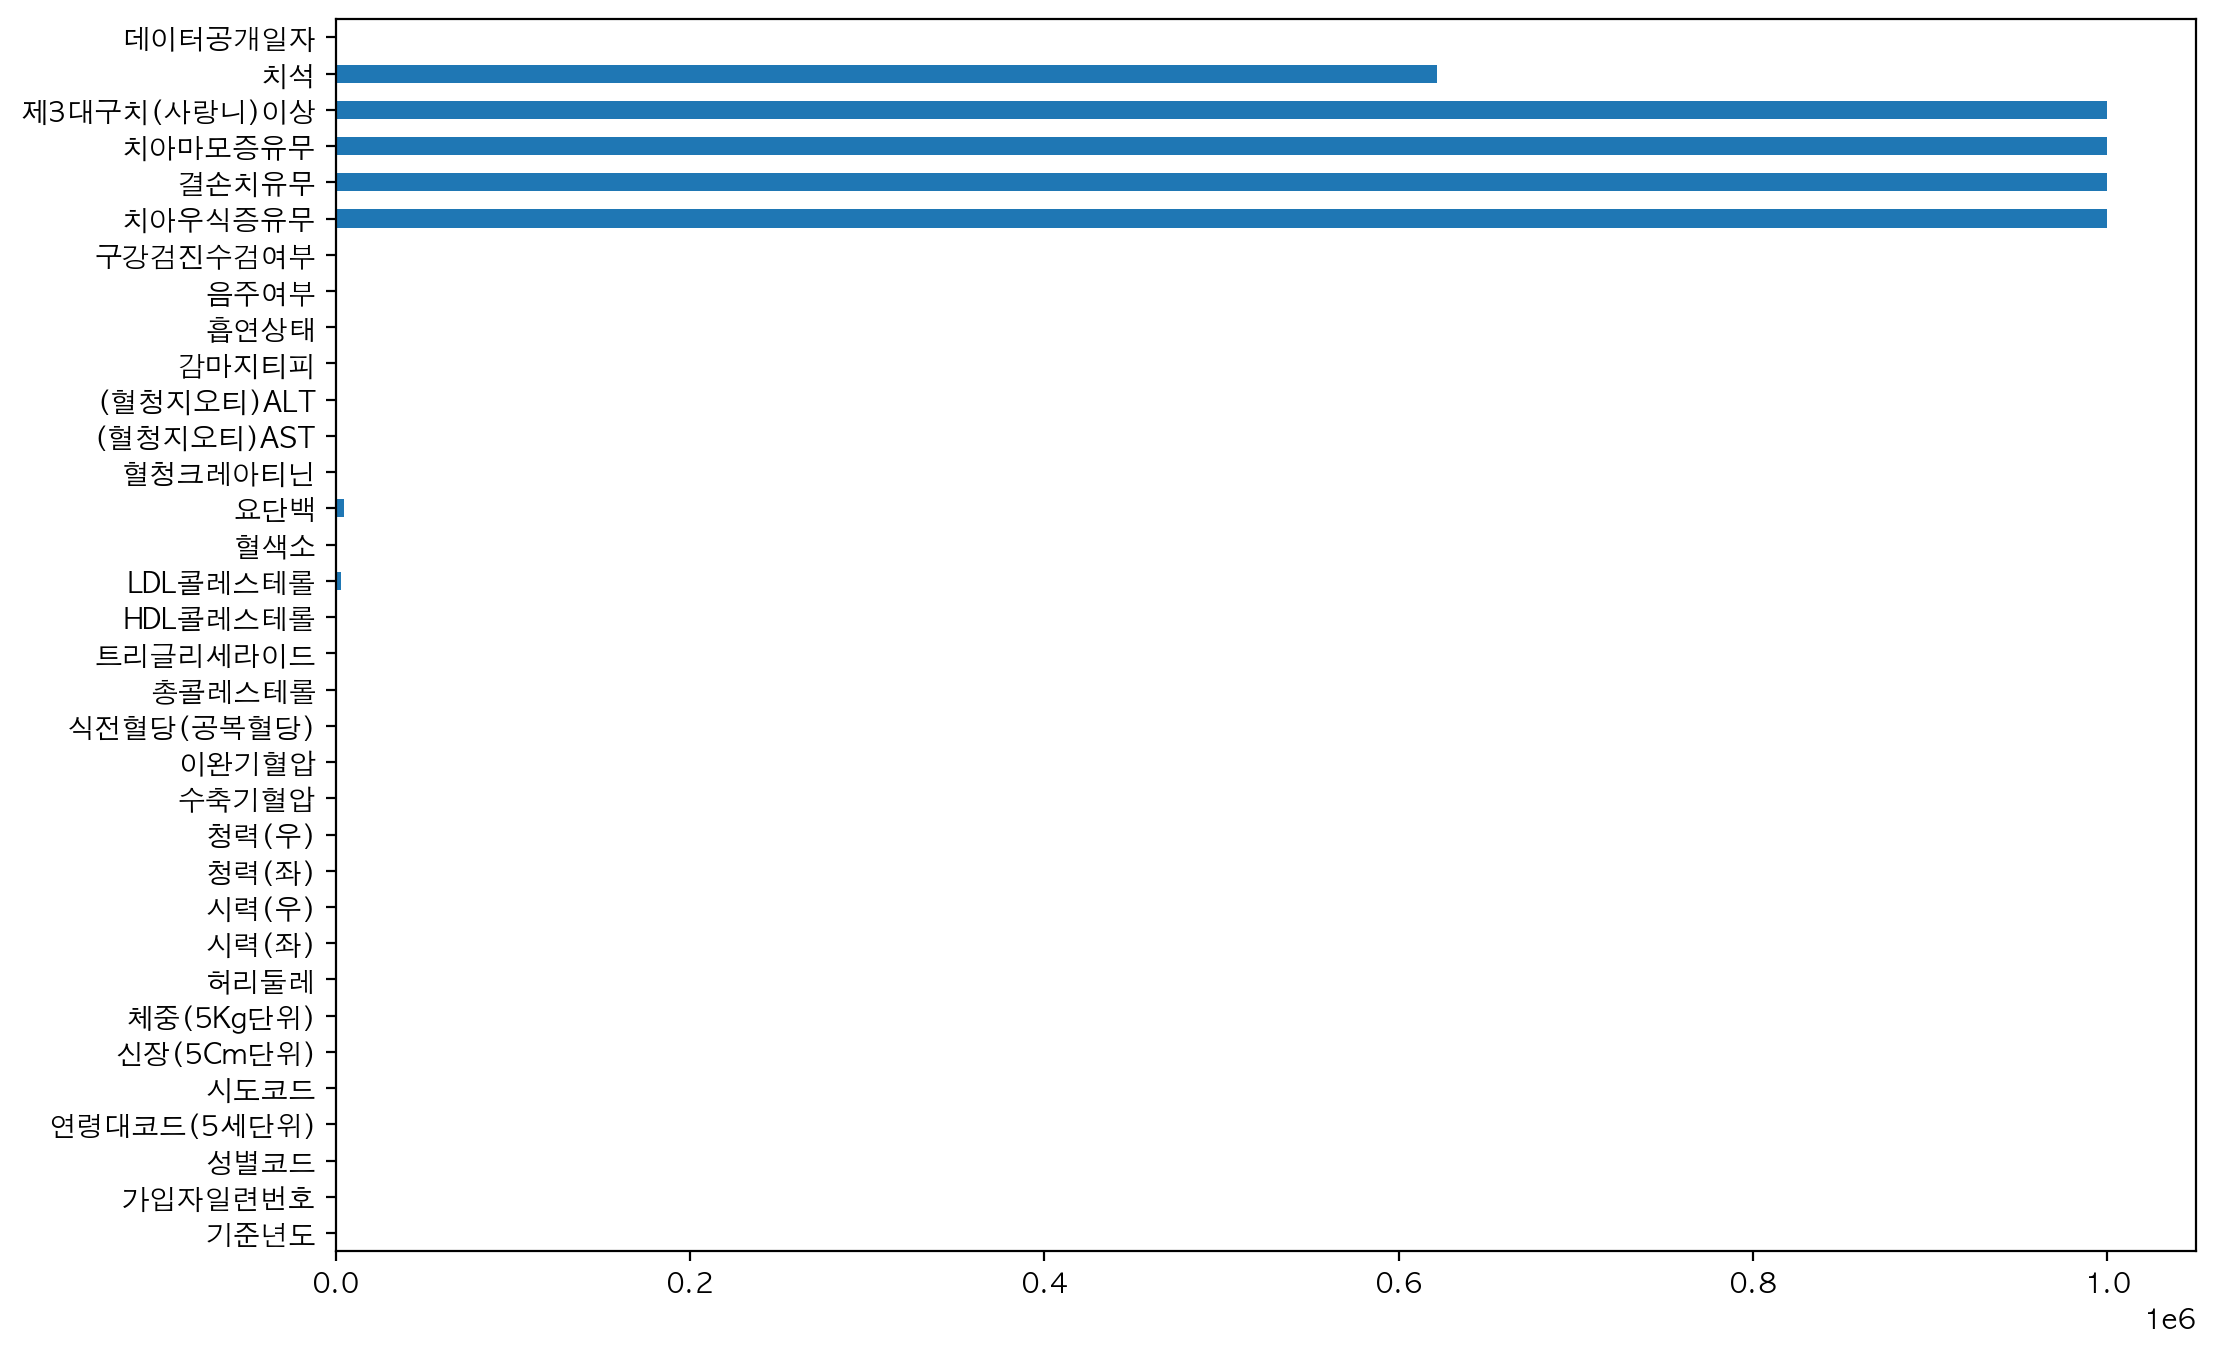

In [15]:
# 판다스에 내장 된 plot을 통해 시각화를 합니다.
df.isna().sum().plot.barh(figsize=(12, 8))

## 8. 일부 데이터 요약하기

In [16]:
# 여러 컬럼을 가져옵니다.
# "(혈청지오티)ALT", "(혈청지오티)AST"를 가져와 미리보기 합니다.
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

,(혈청지오티)ALT,(혈청지오티)AST
0,35.0,21.0
1,36.0,20.0
2,32.0,47.0
3,34.0,29.0
4,12.0,19.0


In [17]:
# "(혈청지오티)ALT", "(혈청지오티)AST"를 요약합니다.
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999958 non-null  float64
 1   (혈청지오티)AST  999959 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [18]:
# 이상치 확인 가능
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


## 9. value_counts로 값 집계하기

In [19]:
# value_counts 를 통해 성별코드로 그룹화 하고 갯수를 집계합니다.
df['성별코드'].value_counts()

성별코드
1    530410
2    469590
Name: count, dtype: int64

In [20]:
# value_counts 를 통해 흡연상태로 그룹화 하고 갯수를 집계합니다.
df['흡연상태'].value_counts()

흡연상태
1.0    607942
3.0    215702
2.0    176212
Name: count, dtype: int64

## 10 groupby와 pivot_table 사용하기

### 10.1 groupby

In [21]:
def str_to_int(x):
    if x == 'N':
        return 0.0
    else:
        return 1.0

In [22]:
# object -> int
df['음주여부'] = df['음주여부'].map(str_to_int)
df['구강검진수검여부'] = df['구강검진수검여부'].map(str_to_int)
df['치석'] = df['치석'].map(str_to_int)

# object -> datetime -> int
df['데이터공개일자'] = pd.to_datetime(df['데이터공개일자']).dt.year
df['데이터공개일자'] = pd.to_numeric(df['데이터공개일자'])

In [23]:
# groupby를 통해 데이터를 그룹화 합니다.
# 성별코드로 그룹화 한 데이터를 세어봅니다.
df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [24]:
# 성별코드와 음주여부로 그룹화를 하고 갯수를 세어봅니다.
df.groupby(['성별코드', '음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     173612
      1.0     356798
2     0.0     326827
      1.0     142763
Name: 가입자일련번호, dtype: int64

In [25]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균을 구합니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     0.0     34.739868
      1.0     56.600358
2     0.0     22.612408
      1.0     24.990053
Name: 감마지티피, dtype: float64

In [26]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구합니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356787.0  56.600358  68.849145  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142754.0  24.990053  36.693011  1.0  13.0  17.0  25.0  999.0

In [27]:
# agg을 사용하면 여러 수치를 함께 구할 수 있습니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(['count', 'mean', 'median','std', 'min','max'])

count       mean  median        std  min    max
성별코드 음주여부                                                  
1    0.0   173604  34.739868    25.0  37.606197  1.0  999.0
     1.0   356787  56.600358    37.0  68.849145  1.0  999.0
2    0.0   326813  22.612408    17.0  25.203579  1.0  999.0
     1.0   142754  24.990053    17.0  36.693011  1.0  999.0

### 10.2 pivot_table
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [28]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구합니다.
# pivot : 연산을 사용하지 않고 쓰려고 할 때 사용
# pivot_table : 연산 사용
df.pivot_table(index='음주여부', values='가입자일련번호', aggfunc='count')

,가입자일련번호
음주여부,
0.0,500439
1.0,499561


In [29]:
# 음주여부에 따른 감마지티피의 평균을 구합니다.
pd.pivot_table(df, index='음주여부', values='감마지티피')

,감마지티피
음주여부,
0.0,26.819650
1.0,47.567071


In [30]:
# 기본값은 평균을 구하지만 aggfunc을 통해 지정해 줄 수도 있습니다.
pd.pivot_table(df, index='음주여부', values='감마지티피', aggfunc='mean')

,감마지티피
음주여부,
0.0,26.819650
1.0,47.567071


In [31]:
# aggfunc에 여러 값을 한번에 지정할 수도 있습니다.
pd.pivot_table(df, index='음주여부', values='감마지티피', aggfunc=['mean', 'median', 'min', 'max'])

,mean,median,min,max
,감마지티피,감마지티피,감마지티피,감마지티피
음주여부,,,,
0.0,26.819650,19.0,1.0,999.0
1.0,47.567071,29.0,1.0,999.0


In [32]:
# aggfunc에 describe를 사용해 통계요약값을 한번에 볼 수도 있습니다.
pd.pivot_table(df, index='음주여부', values='감마지티피', aggfunc='describe')

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,500417.0,999.0,26.819650,1.0,30.639714
1.0,18.0,29.0,52.0,499541.0,999.0,47.567071,1.0,63.041970


In [34]:
# 성별코드, 음주여부에 따른 감마지티피에 값의 평균을 구합니다.
pd.pivot_table(df, index=['성별코드','음주여부'], values='감마지티피')

감마지티피
성별코드 음주여부           
1    0.0   34.739868
     1.0   56.600358
2    0.0   22.612408
     1.0   24.990053

## 11. 전체 데이터 시각화 하기
- 100만개가 넘는 데이터를 시각화할 때는 되도록이면 groupby 혹은 pivot_table로 연산을 하고 시각화를 하는 것을 권장합니다.
- 100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을하는 그래프를 사용하게 되면 많이 느릴 수 있습니다.

### 11.1 히스토그램
- 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어 진것을 확인할 수 있습니다.
- 히스토그램을 사용하면 수치데이터를 bin의 갯수만큼 그룹화 해서 도수분포표를 만들고 그 결과를 시각화합니다.
- 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그립니다.

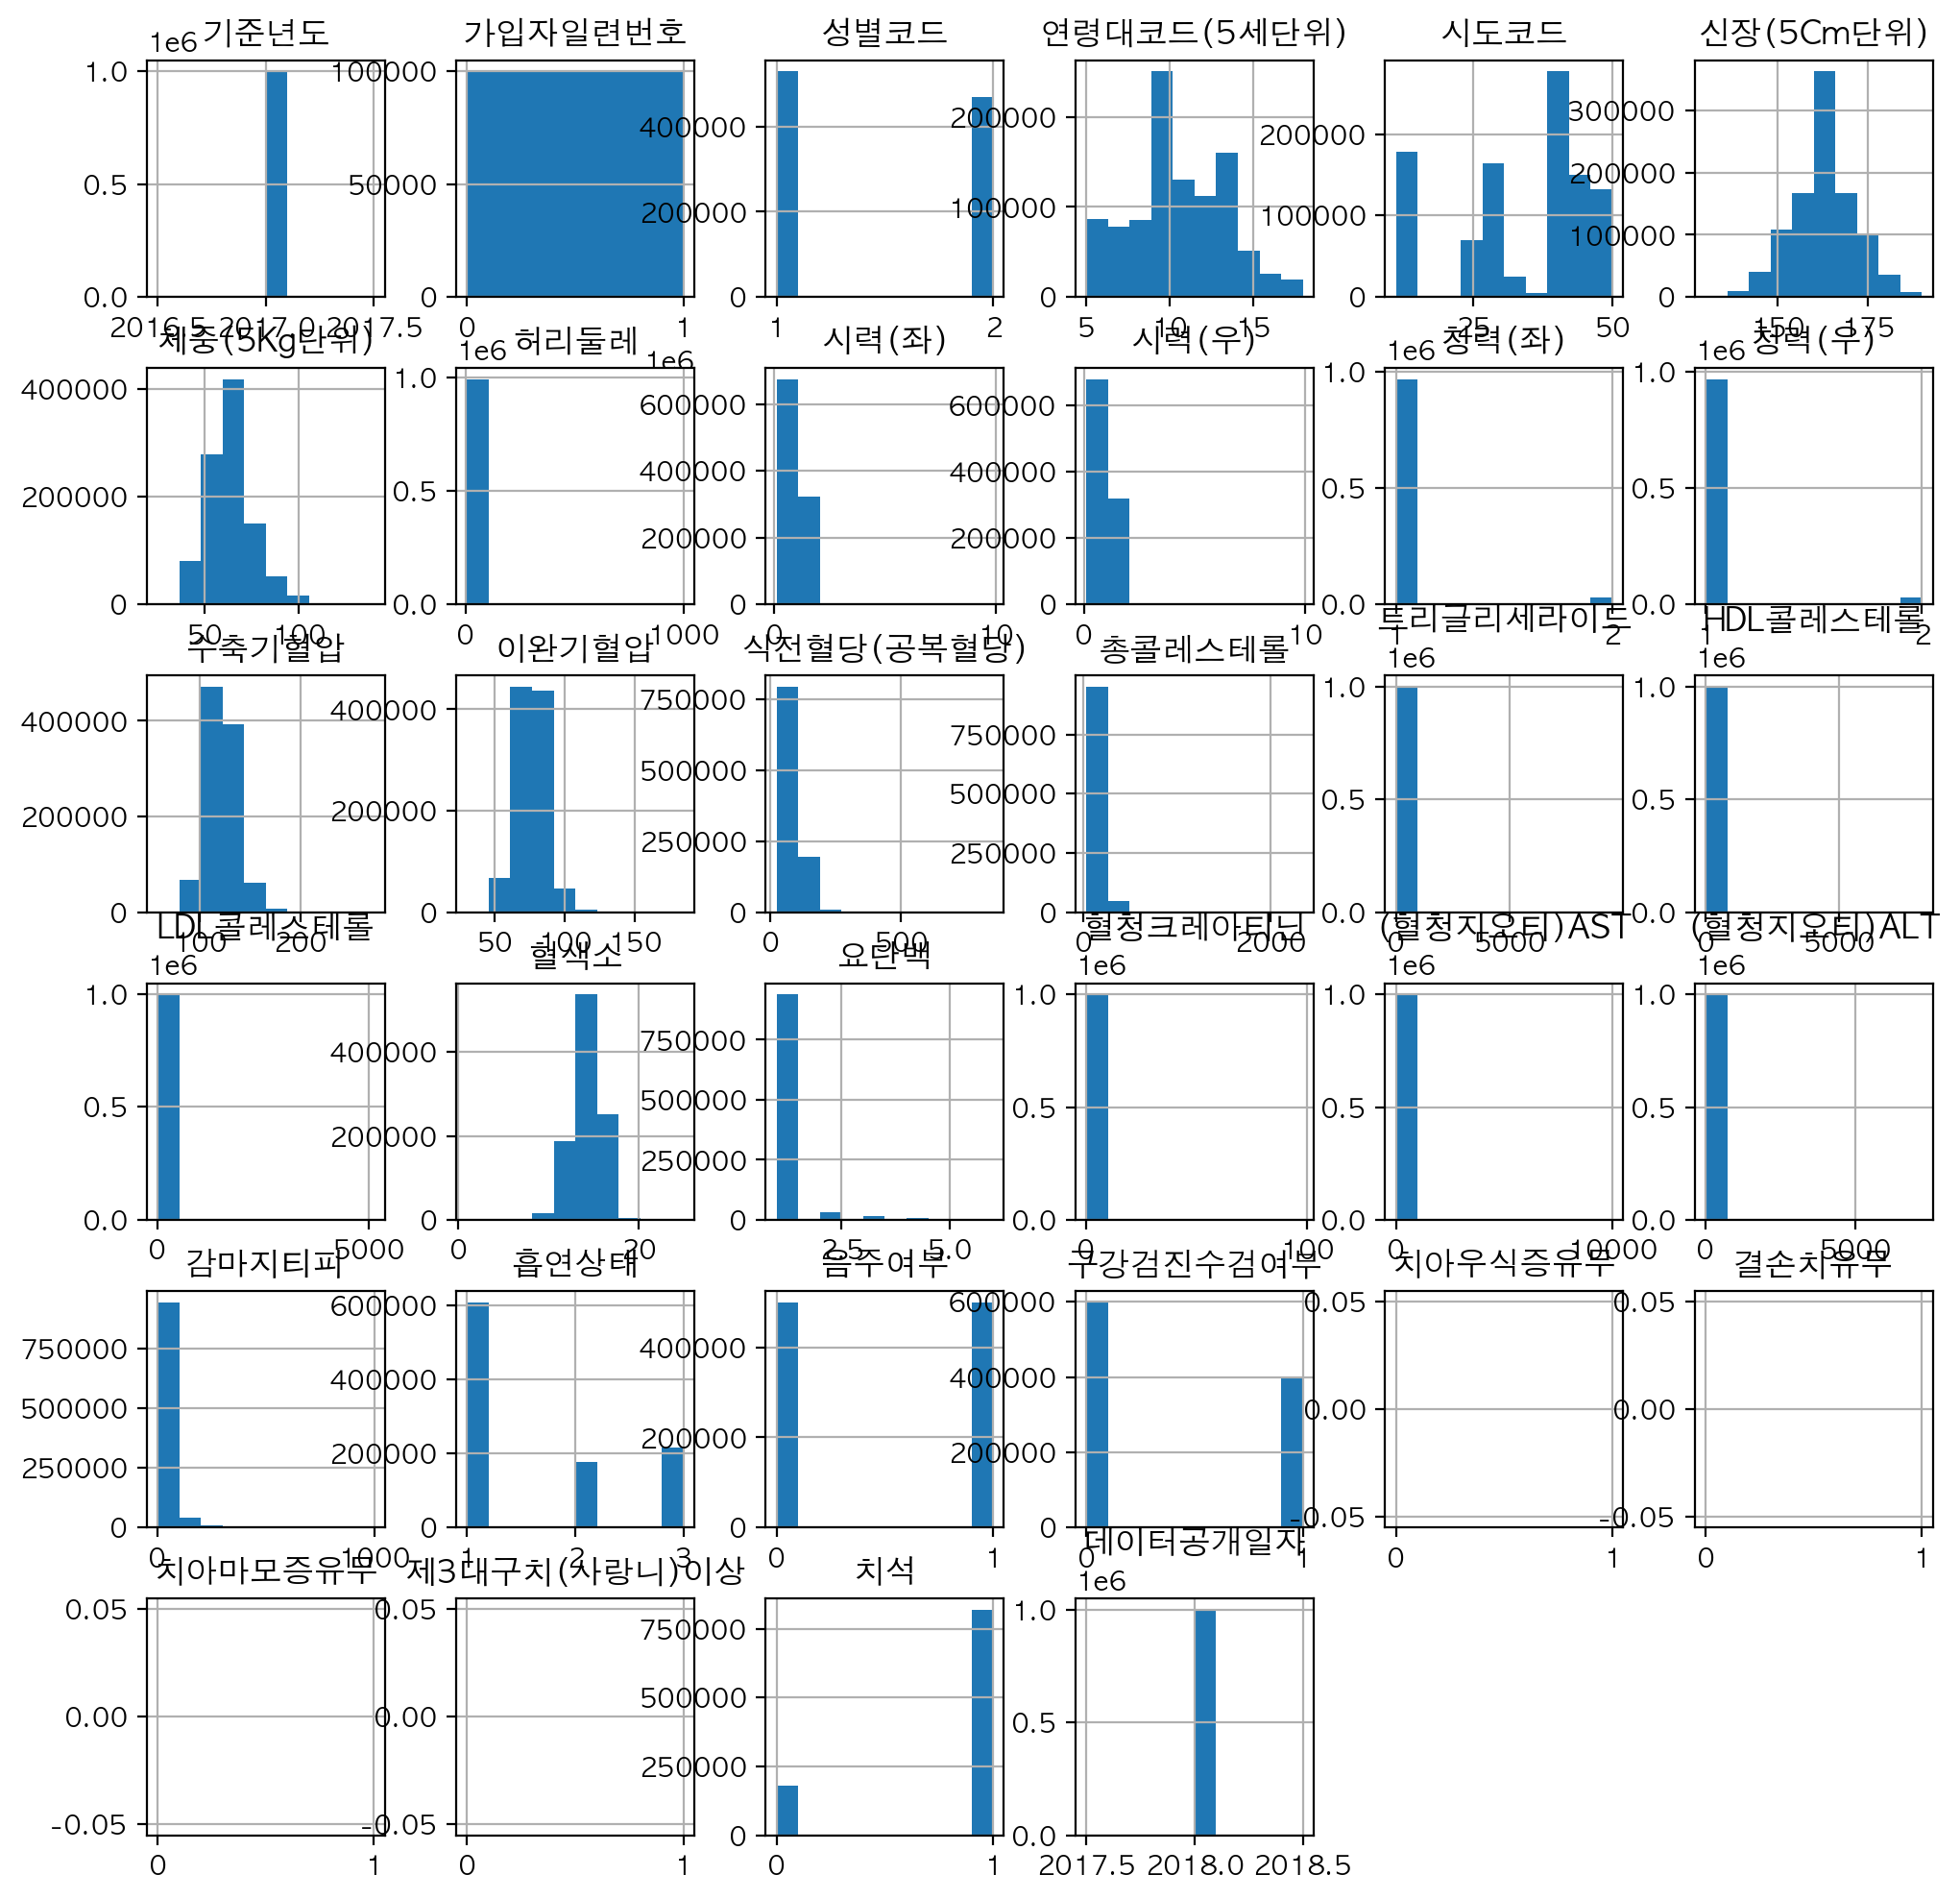

In [37]:
# 전체 데이터에 대한 히스토그램을 출력합니다.
h = df.hist(figsize=(12, 12))
h;

### 11.2 슬라이싱을 사용해 히스토그램 그리기
- 슬라이싱 기능을 사용해서 데이터를 나누어 그립니다.
- 슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능합니다.
- iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 [:, :]을 사용합니다.
- 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인데스:끝나는인덱스(+1)를 지정할 수 있습니다.

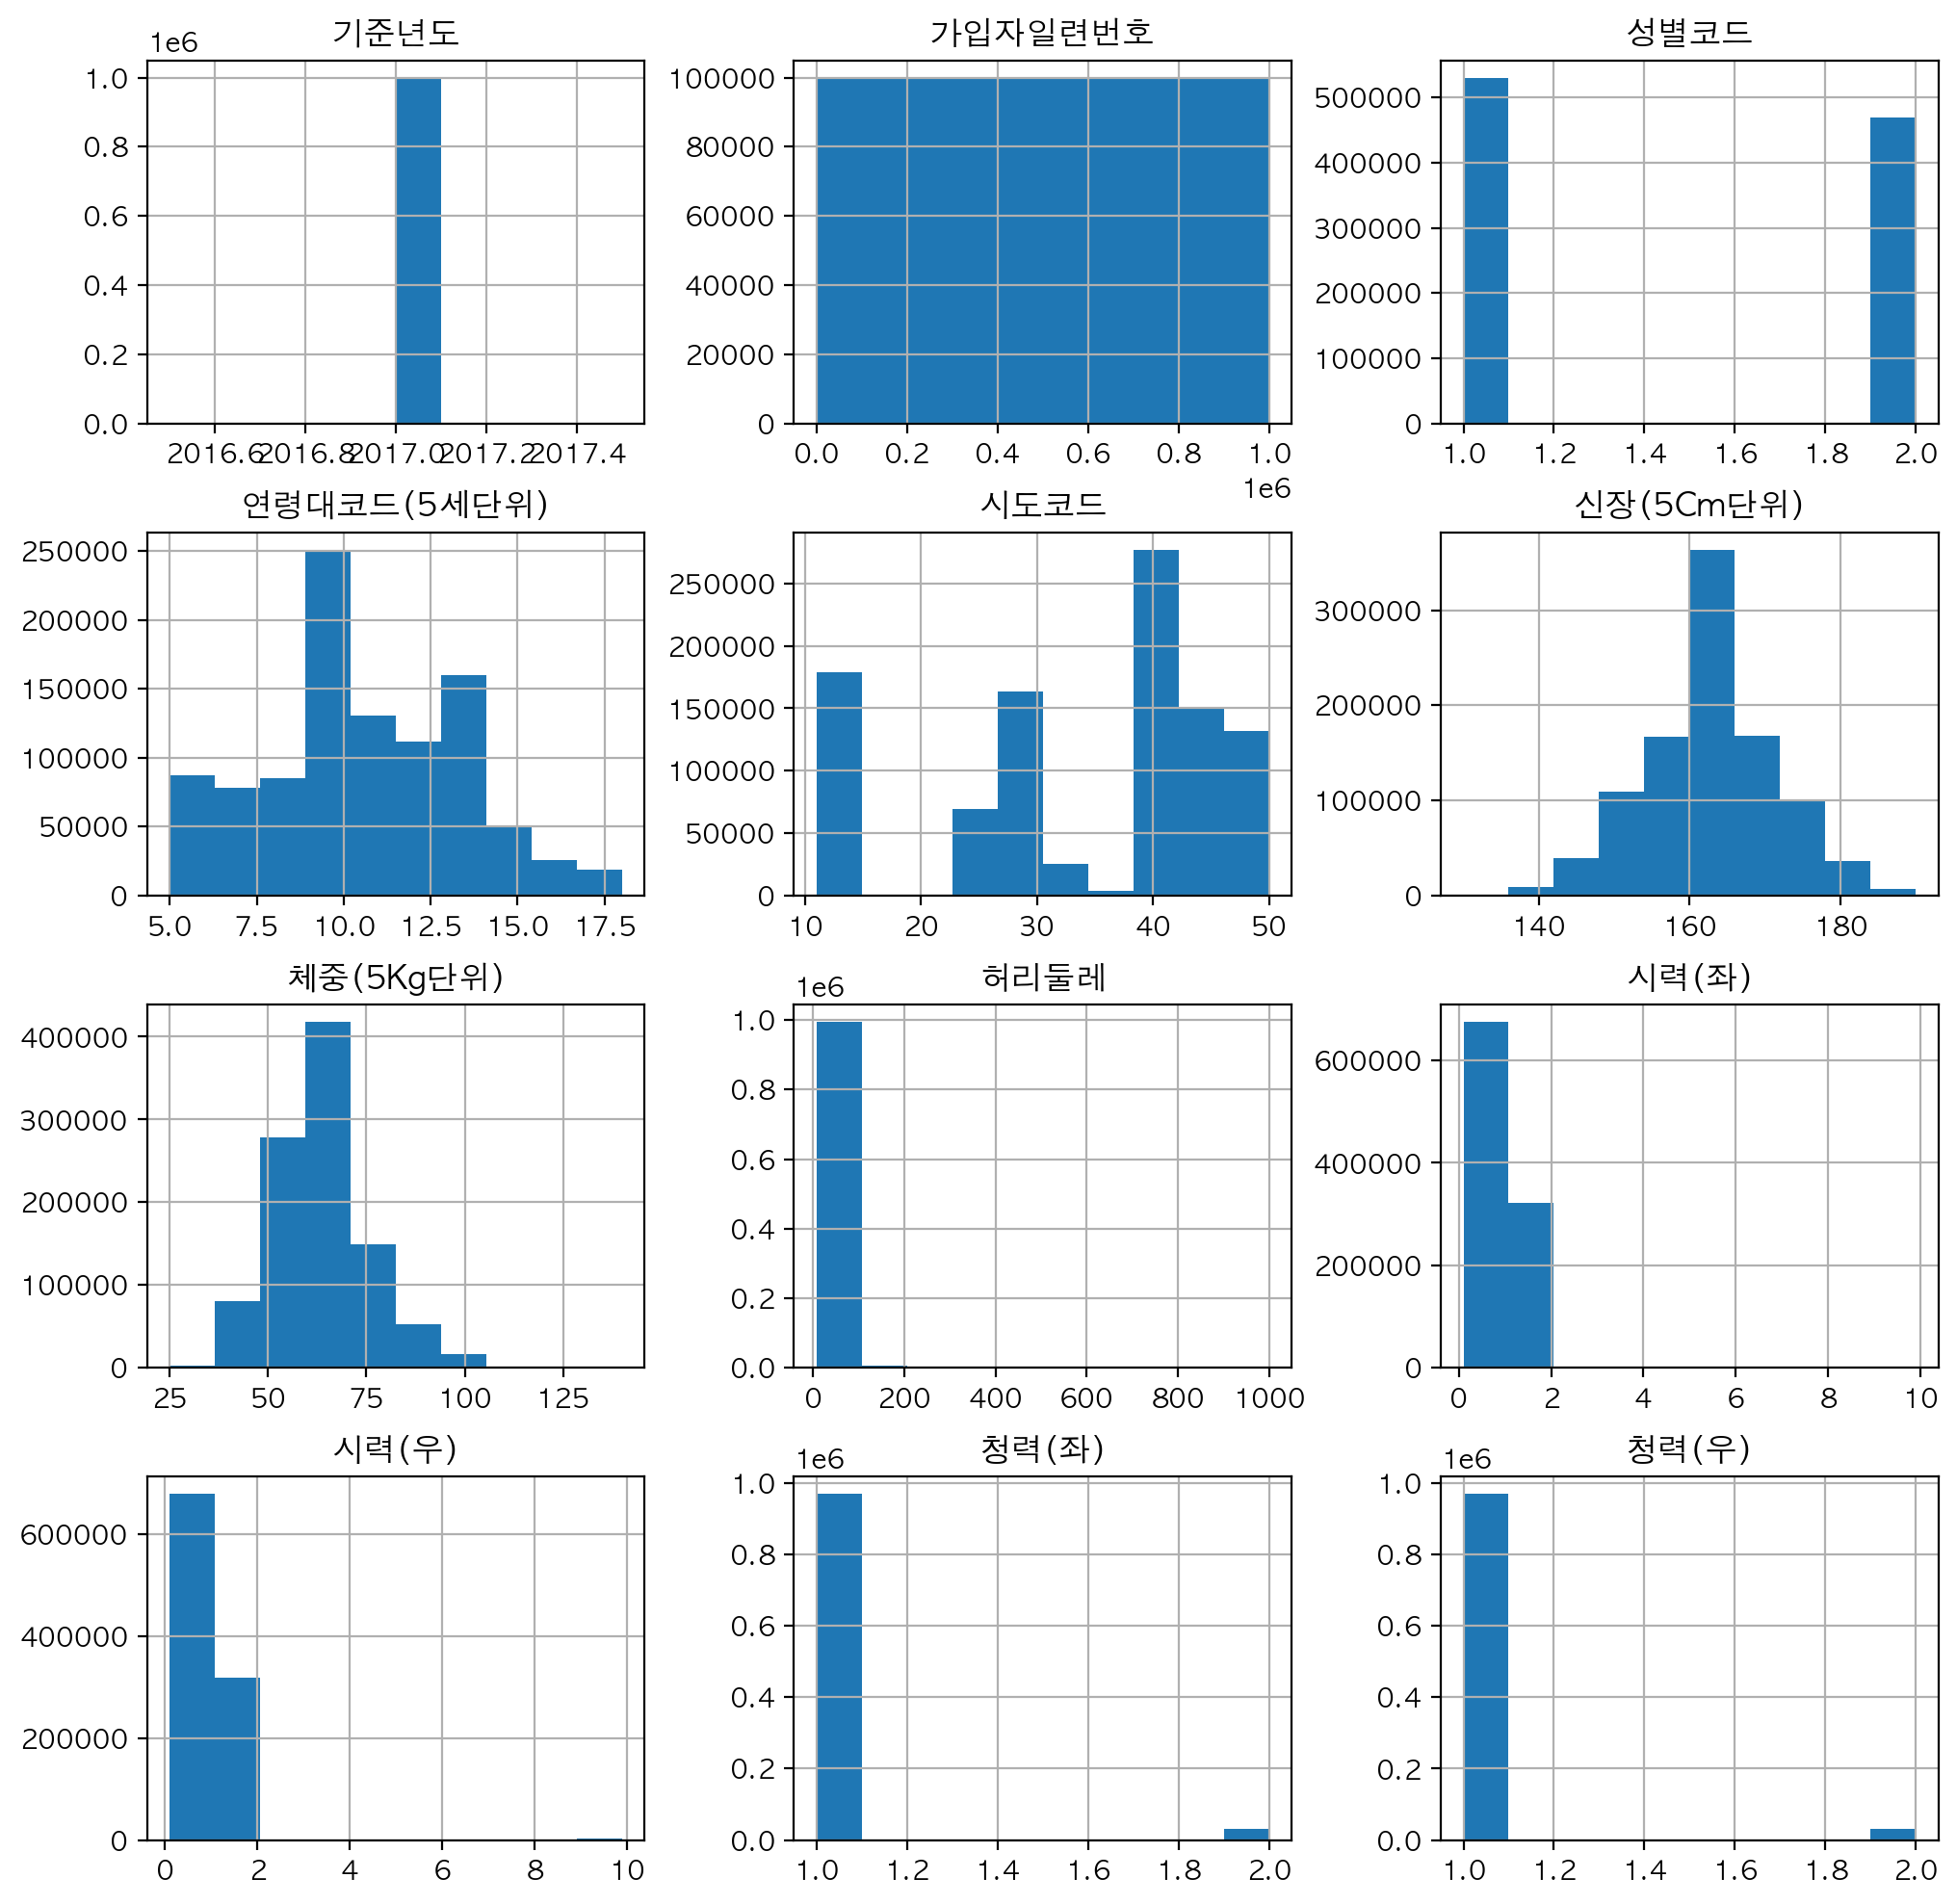

In [39]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램을 그립니다.
# [행, 열]
h = df.iloc[:, :12].hist(figsize=(12, 12))

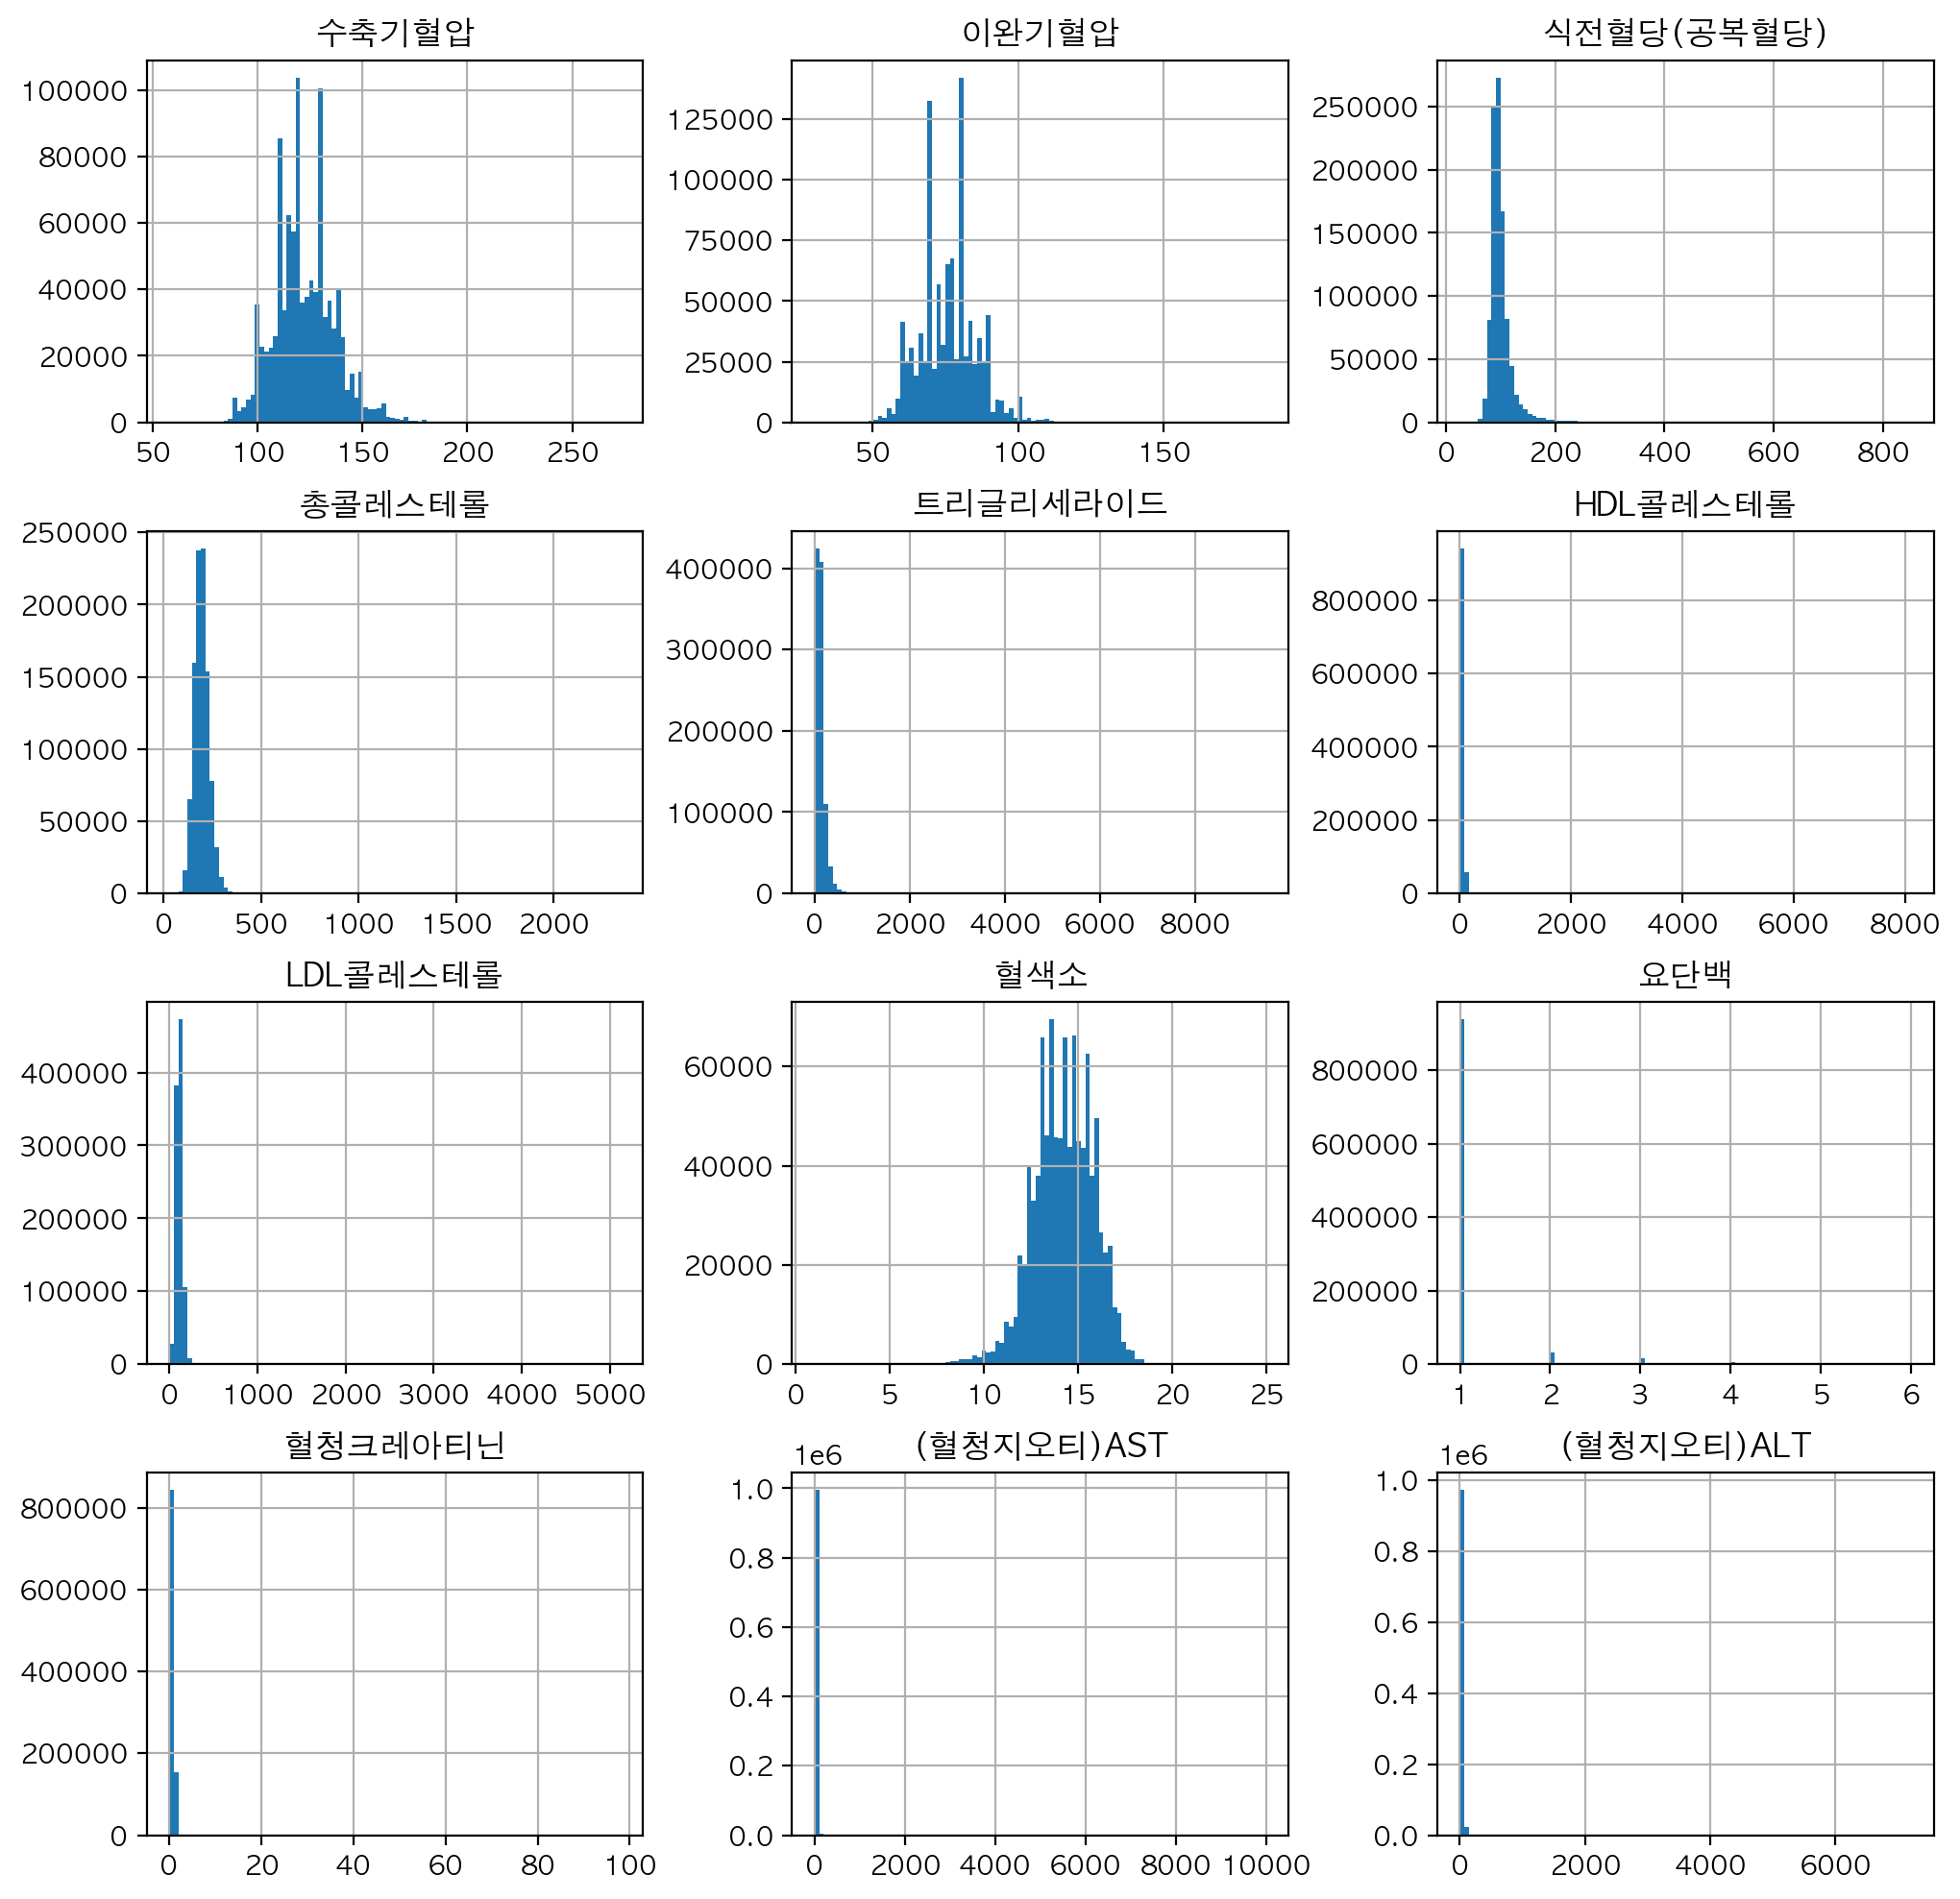

In [42]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지(12:24) 컬럼에 대한 데이터로 히스토그램을 그립니다.
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100)

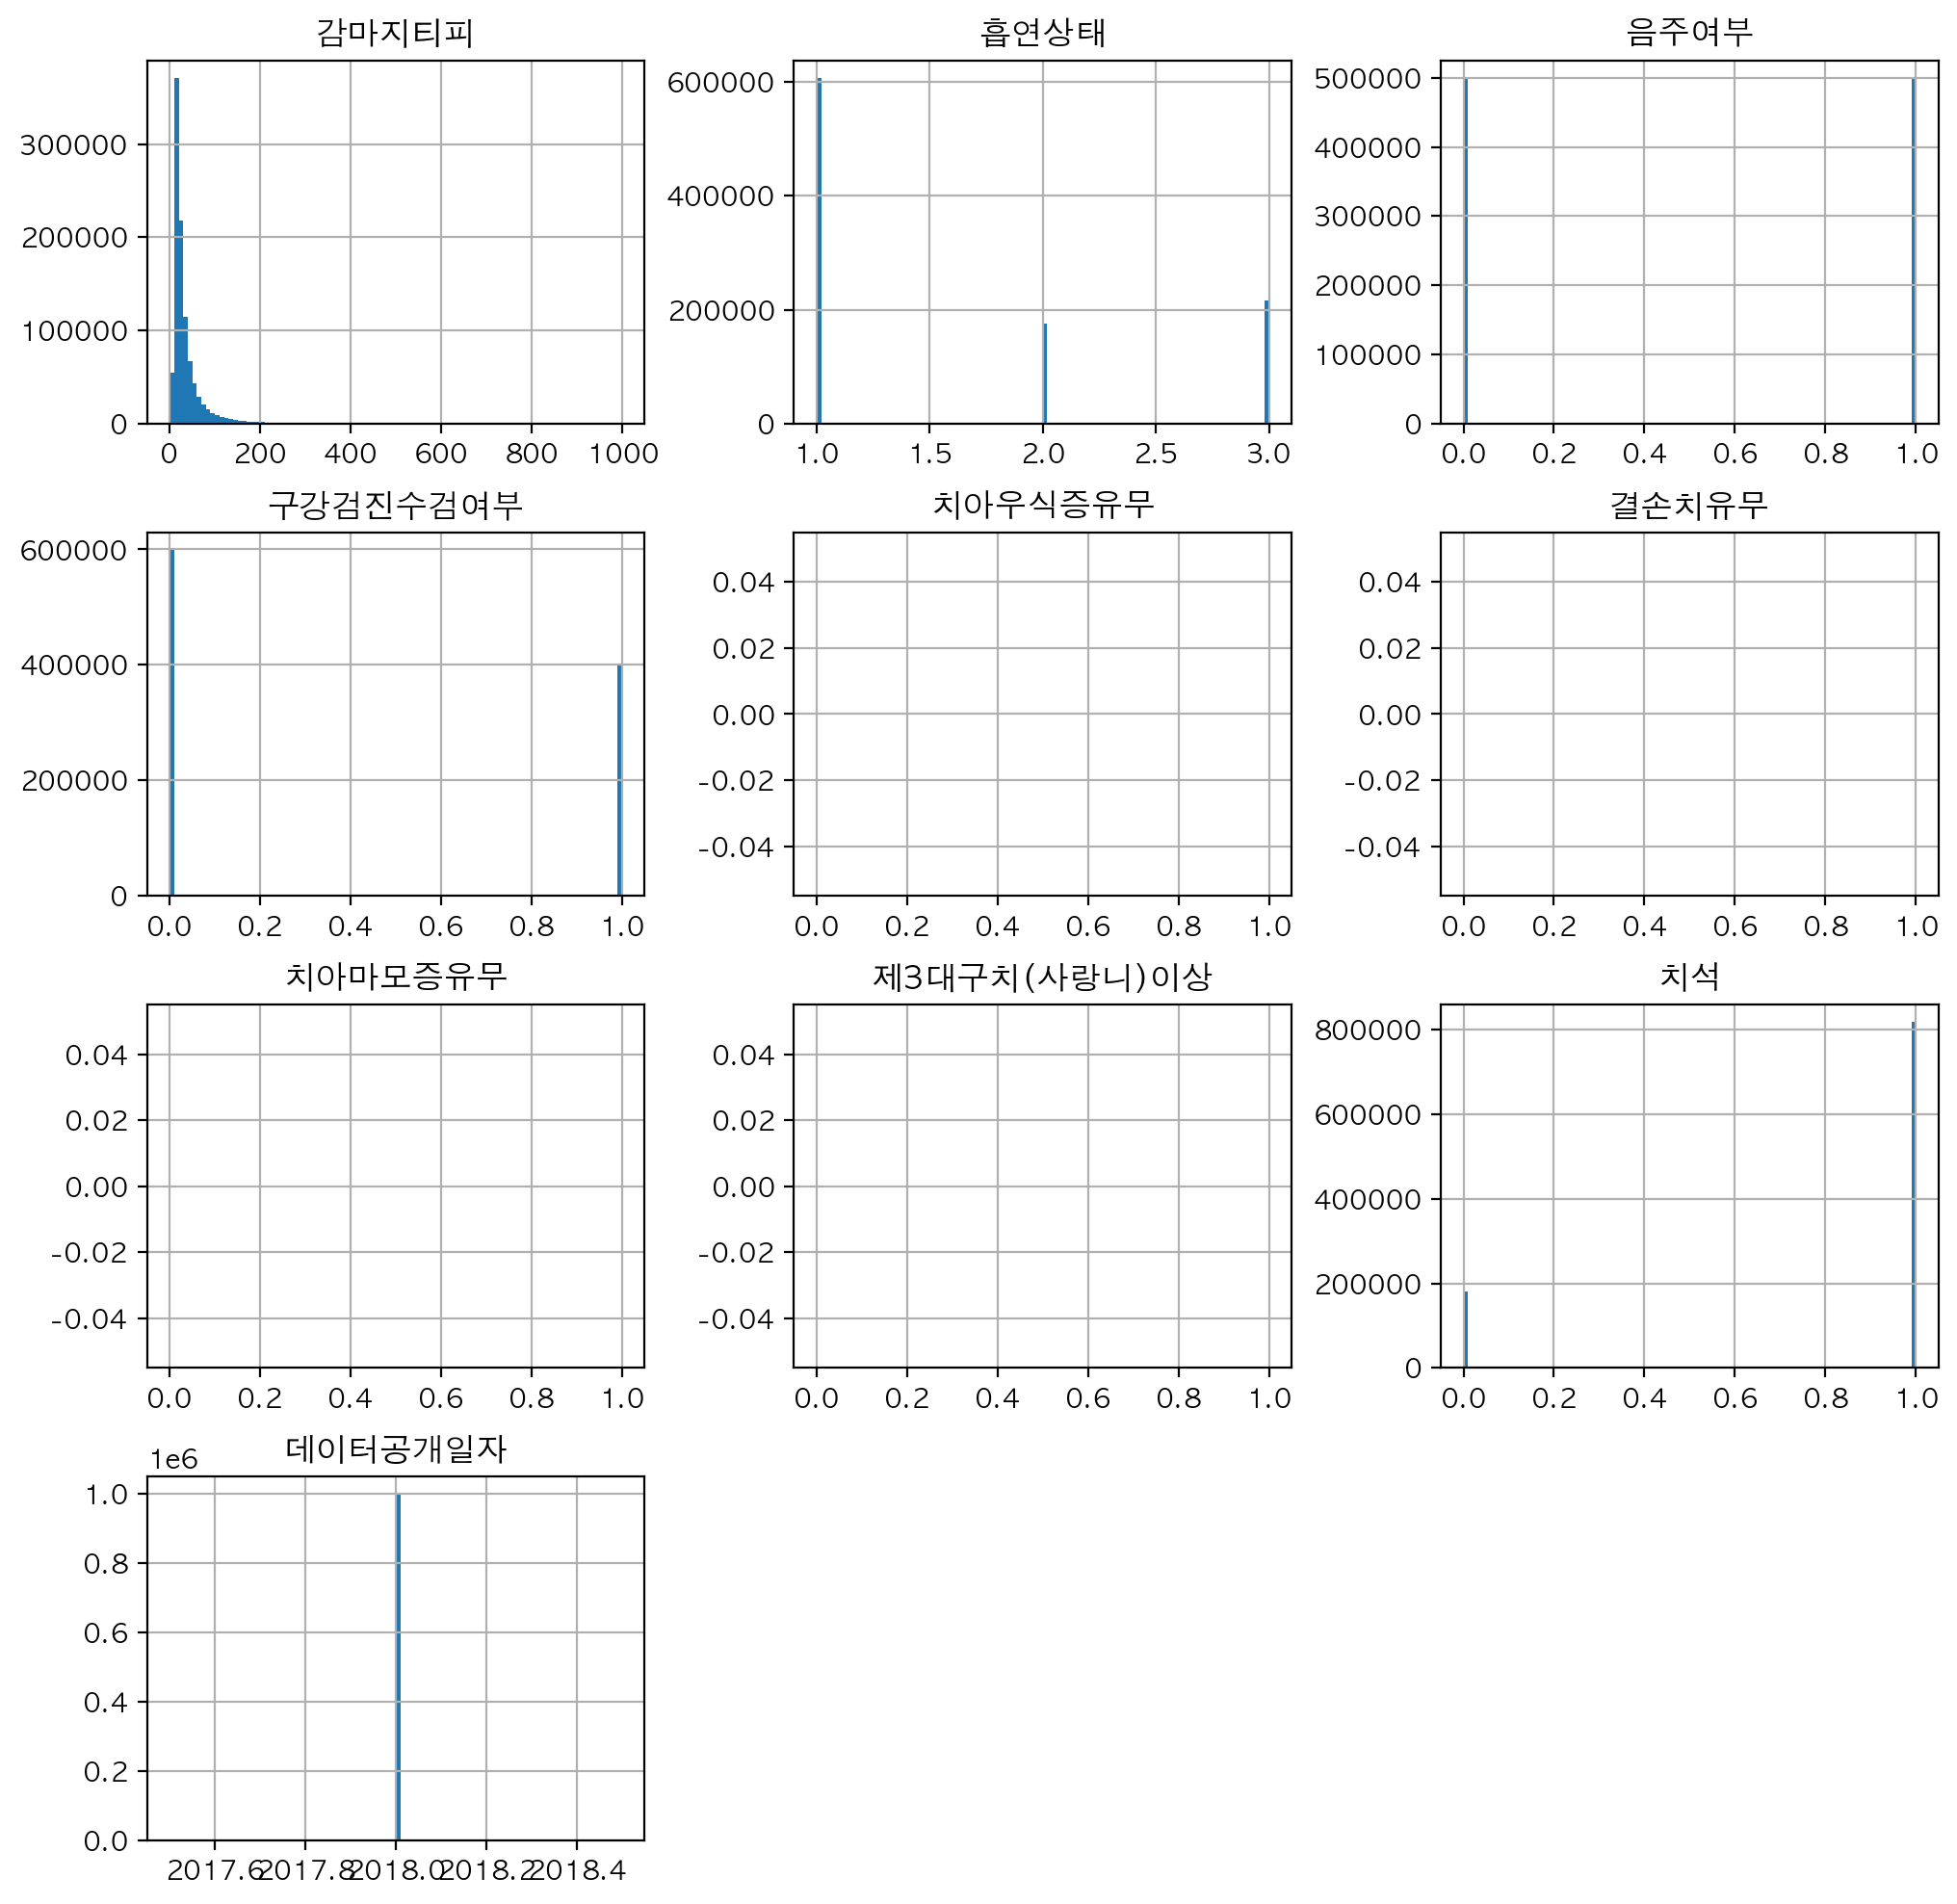

In [43]:
# 슬라이싱을 사용해 앞에서 24번째부터 마지막까지(24:) 컬럼에 대한 데이터로 히스토그램을 그립니다.
h = df.iloc[:, 24:].hist(figsize=(12, 12), bins=100)

## 12. 샘플데이터 추출하기
- seaborn의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도가 오래걸립니다.
- 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해서 사용합니다.

In [47]:
# df.sample을 통해 일부 데이터만 샘플데이터를 추출합니다.
# random_state를 사용해 샘플링되는 값을 고정할 수 있습니다.
# 실험을 통제하기 위해 random_state를 고정하기도 합니다.
# 여기에서는 1을 사용하겠습니다. 이 값은 높든 낮든 상관 없이 값을 고정시키는 역할만 합니다.
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

## 13. 데이터 시각화 도구 seaborn 사용하기
- https://seaborn.pydata.rog/
- seaborn은 https://matplotlib.org/ 을 사용하기 쉽게 만들어 졌으며, 간단하게 고급 통계 연산을 할 수 있습니다.

## 14. 범주형(카테고리) 데이터 시각화
- countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다.
- value_counts로 구한 값을 시각화 한다고 보면 됩니다.

### 14.1 countplot - 음주여부

<Axes: xlabel='음주여부'>

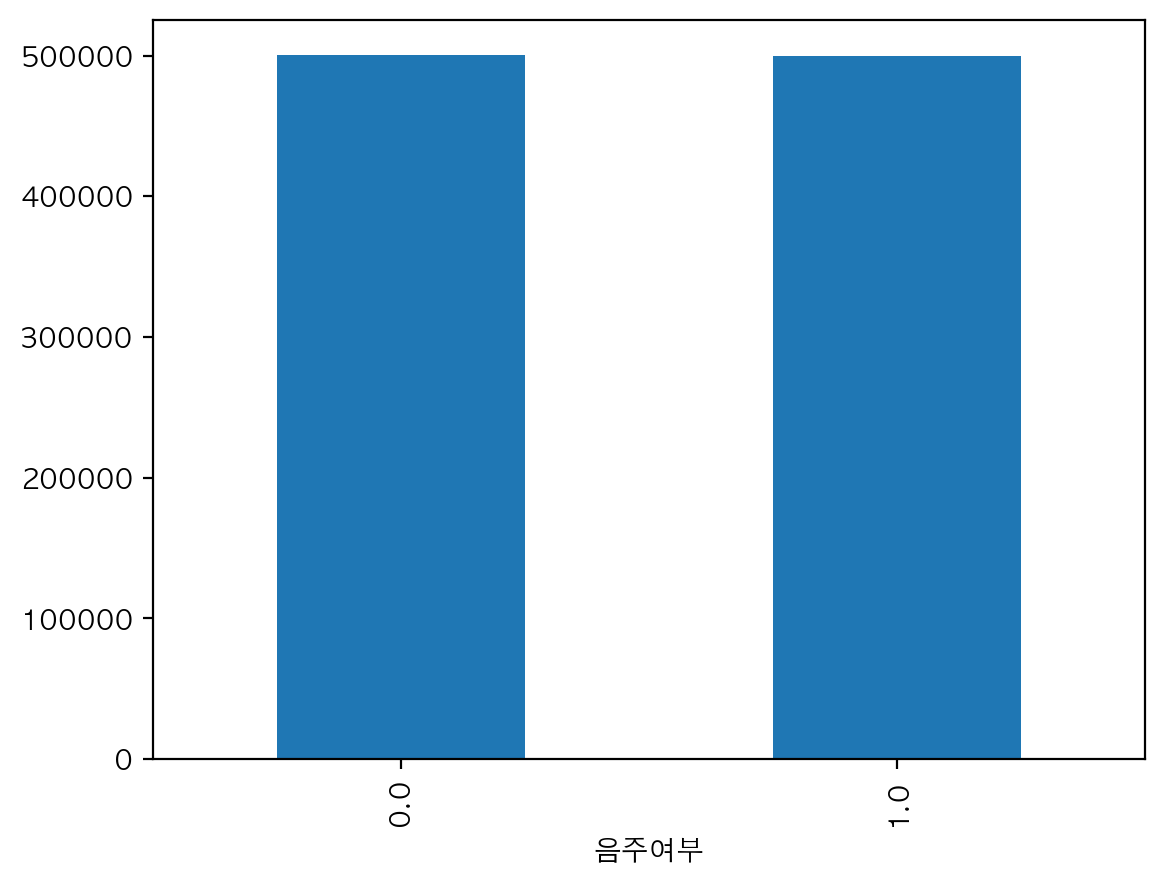

In [52]:
# 음주여부에 따른 countplot을 그립니다.
df['음주여부'].value_counts(normalize=False).plot.bar()

<Axes: xlabel='흡연상태', ylabel='count'>

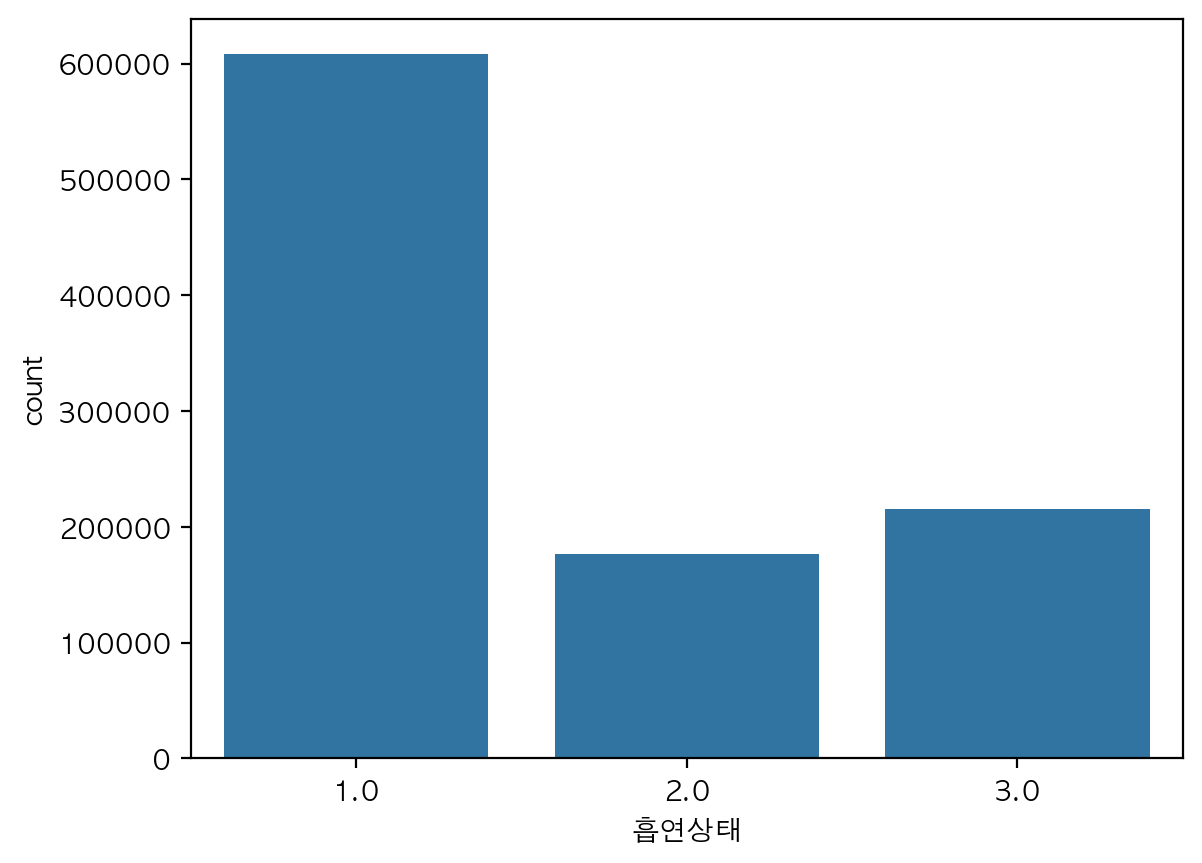

In [55]:
sns.countplot(data=df, x='흡연상태', )

### 14.2 hue 옵션 사용하기

<Axes: xlabel='음주여부', ylabel='count'>

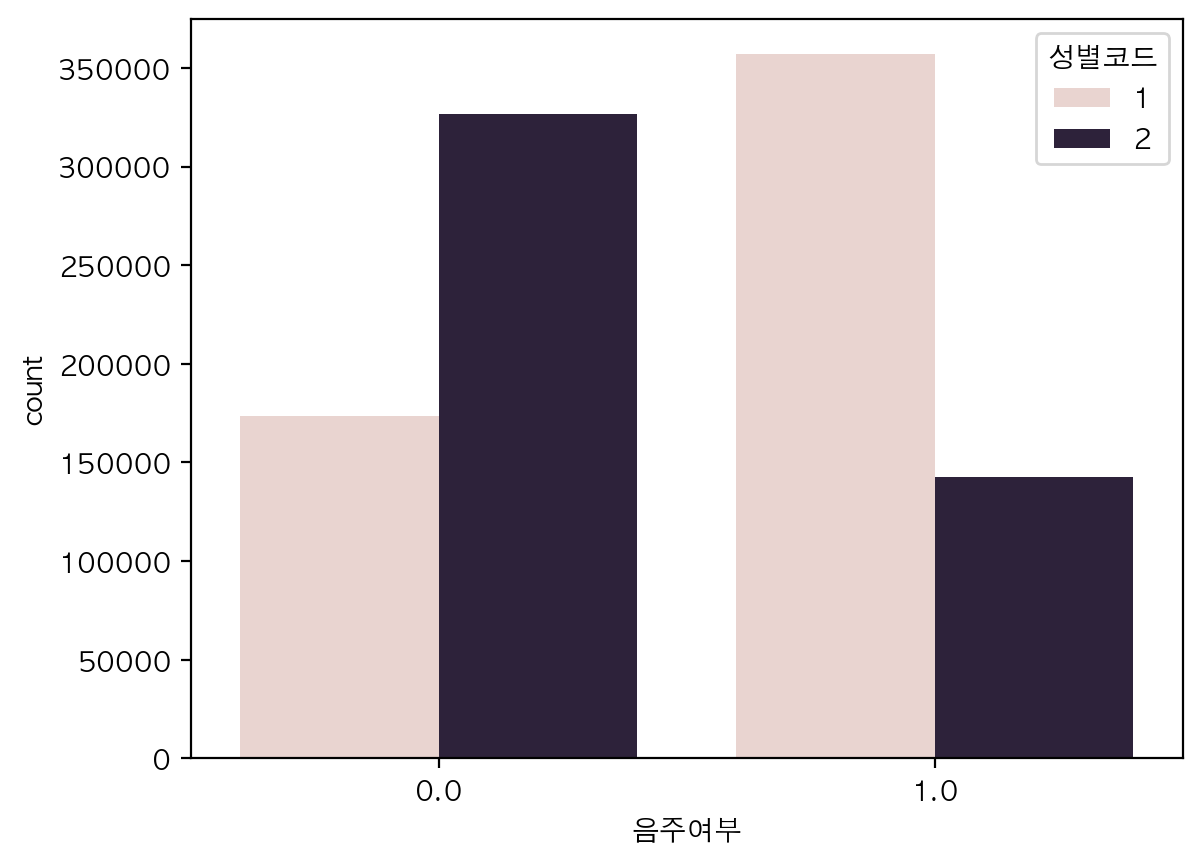

In [57]:
# 음주여부에 따른 countplot을 그리고 hue를 사용해 성별코드로 색상을 구분해 그립니다.
# 여기에서 hue는 포토샵에 있는 hue 메뉴를 떠올리면 됩니다. 색상을 의미합니다.
# 또, seaborn에서 제공하는 폰트 설정을 사용하실 수도 있습니다.
# 다만, 이 때 seaborn의 기본 스타일이 적용되는 것을 확인해 주시는 것이 좋습니다.
# Mac
# sns.set(font_scale=1.5, font='AppleGothic')
# Window
# sns.set(font_scale=1.5, font='Malgun Gothic')
sns.countplot(data=df, x='음주여부', hue='성별코드')

<Axes: xlabel='연령대코드(5세단위)', ylabel='count'>

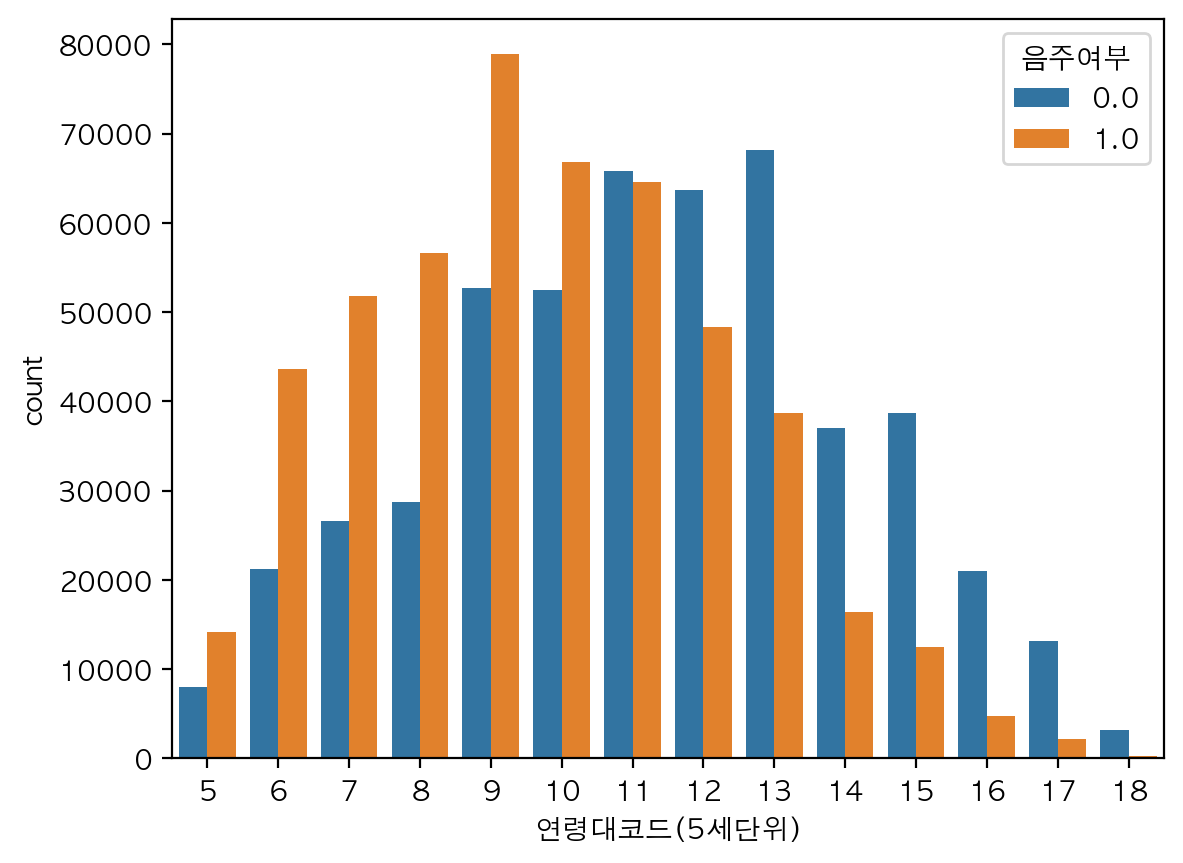

In [58]:
# countplot으로 연령대별 음주여부를 봅니다.
# hue를 사용해 다른 색상으로 표현합니다.
sns.countplot(data=df, x='연령대코드(5세단위)', hue='음주여부')

### 14.3 countplot - 키와 몸무게
- 키와 몸무게는 연속형 데이터라고 볼 수 있습니다.
- 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있습니다.
- 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다.

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

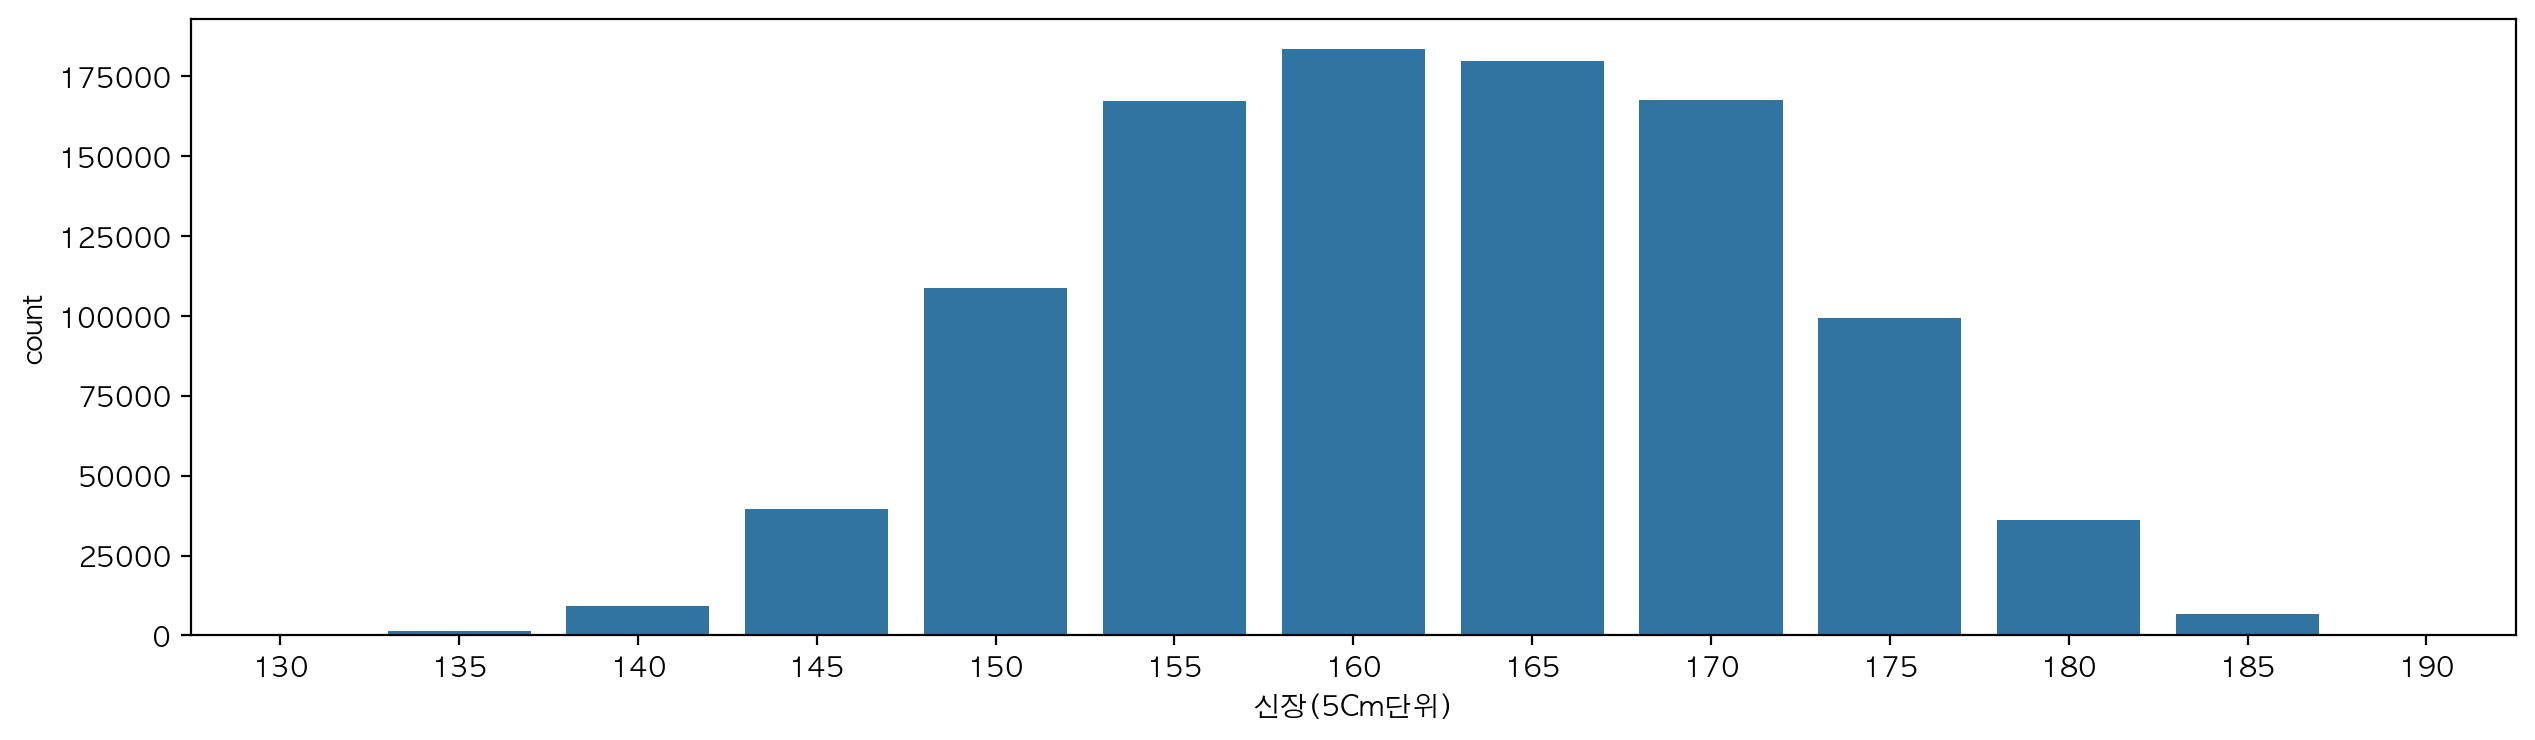

In [61]:
# countplot으로 키를 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='신장(5Cm단위)')

<Axes: xlabel='체중(5Kg단위)', ylabel='count'>

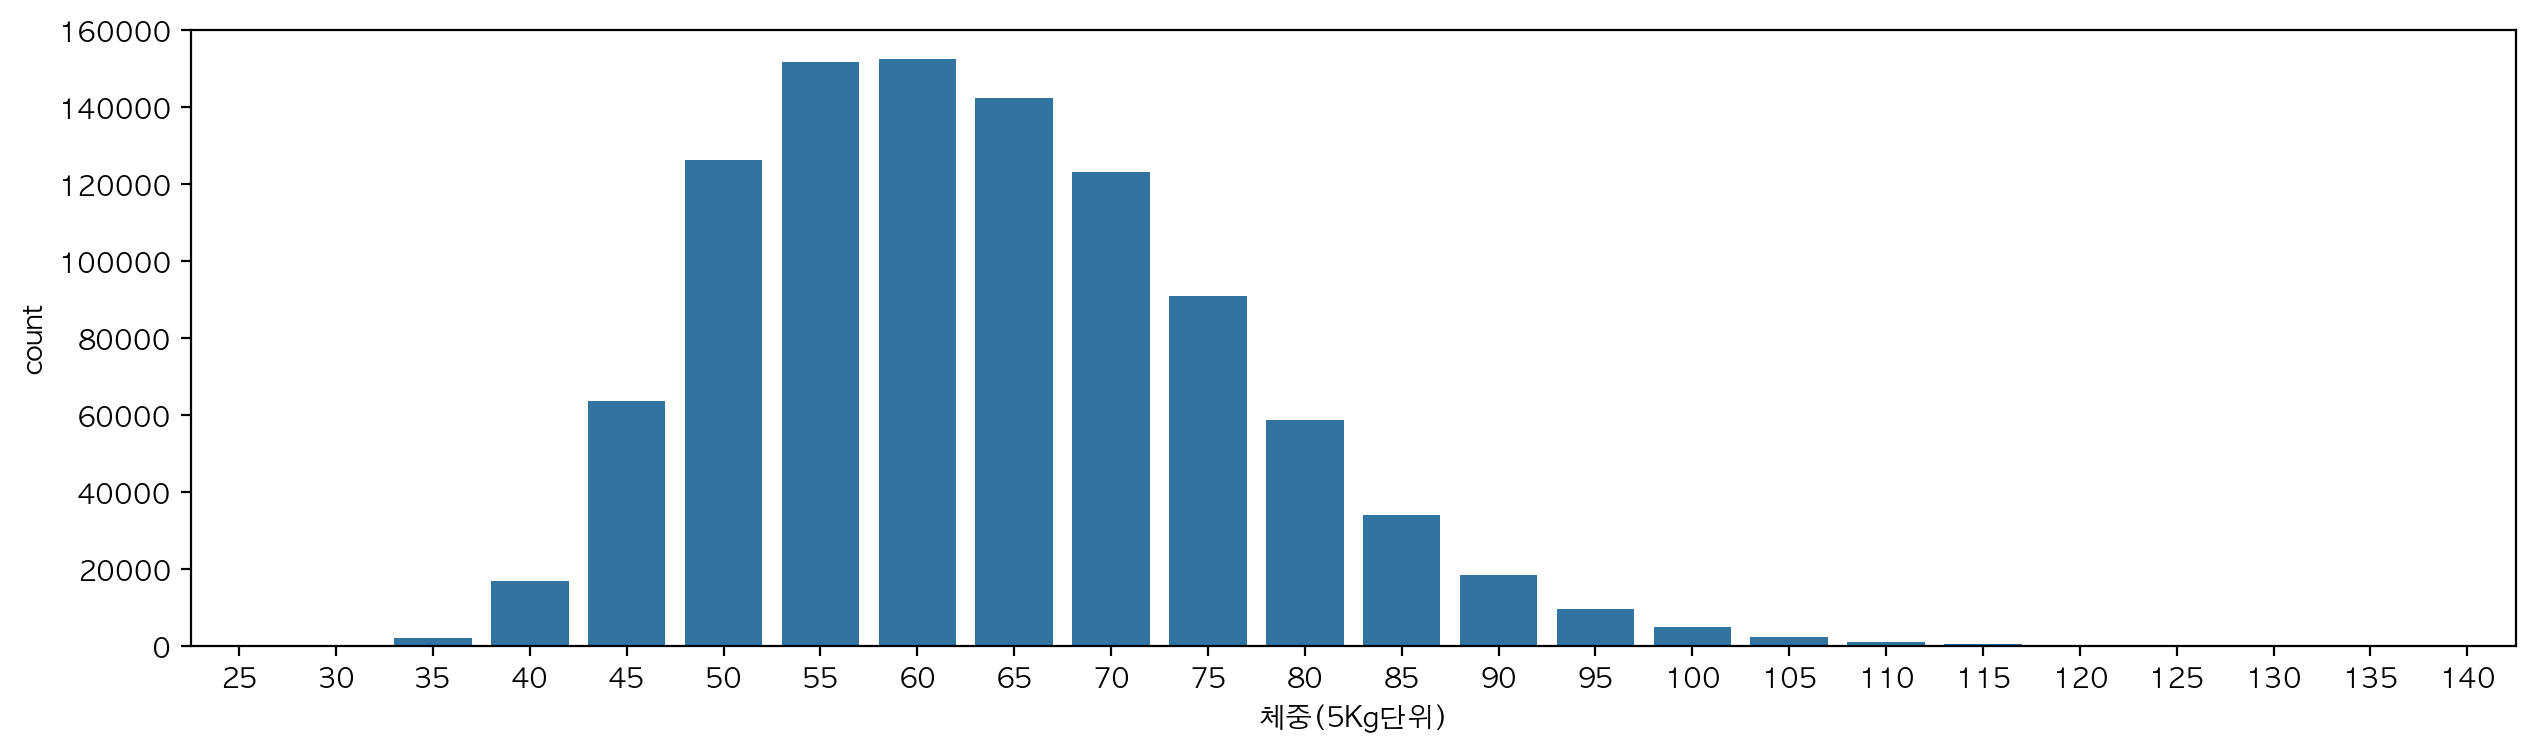

In [63]:
# countplot으로 체중을 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='체중(5Kg단위)')

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

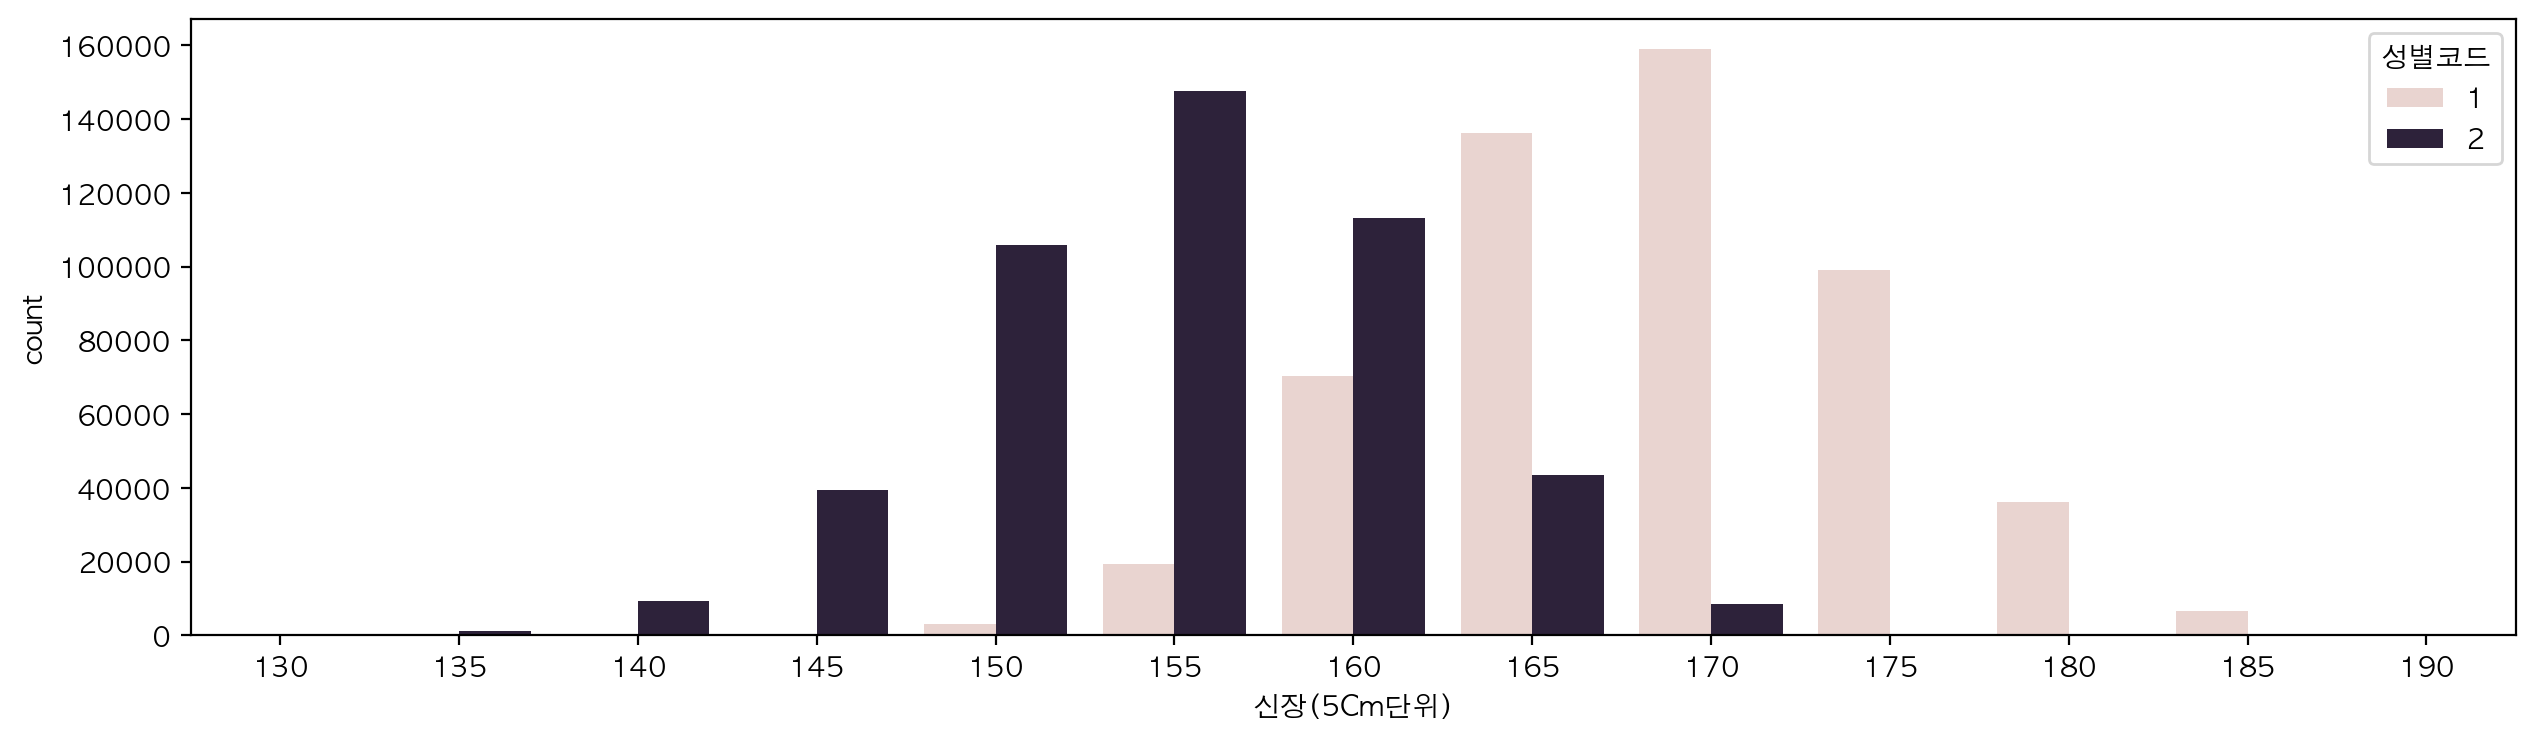

In [66]:
# countplot으로 신장(5Cm단위)를 봅니다.
# 성별에 따른 키의 차이를 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='신장(5Cm단위)', hue='성별코드')

<Axes: xlabel='체중(5Kg단위)', ylabel='count'>

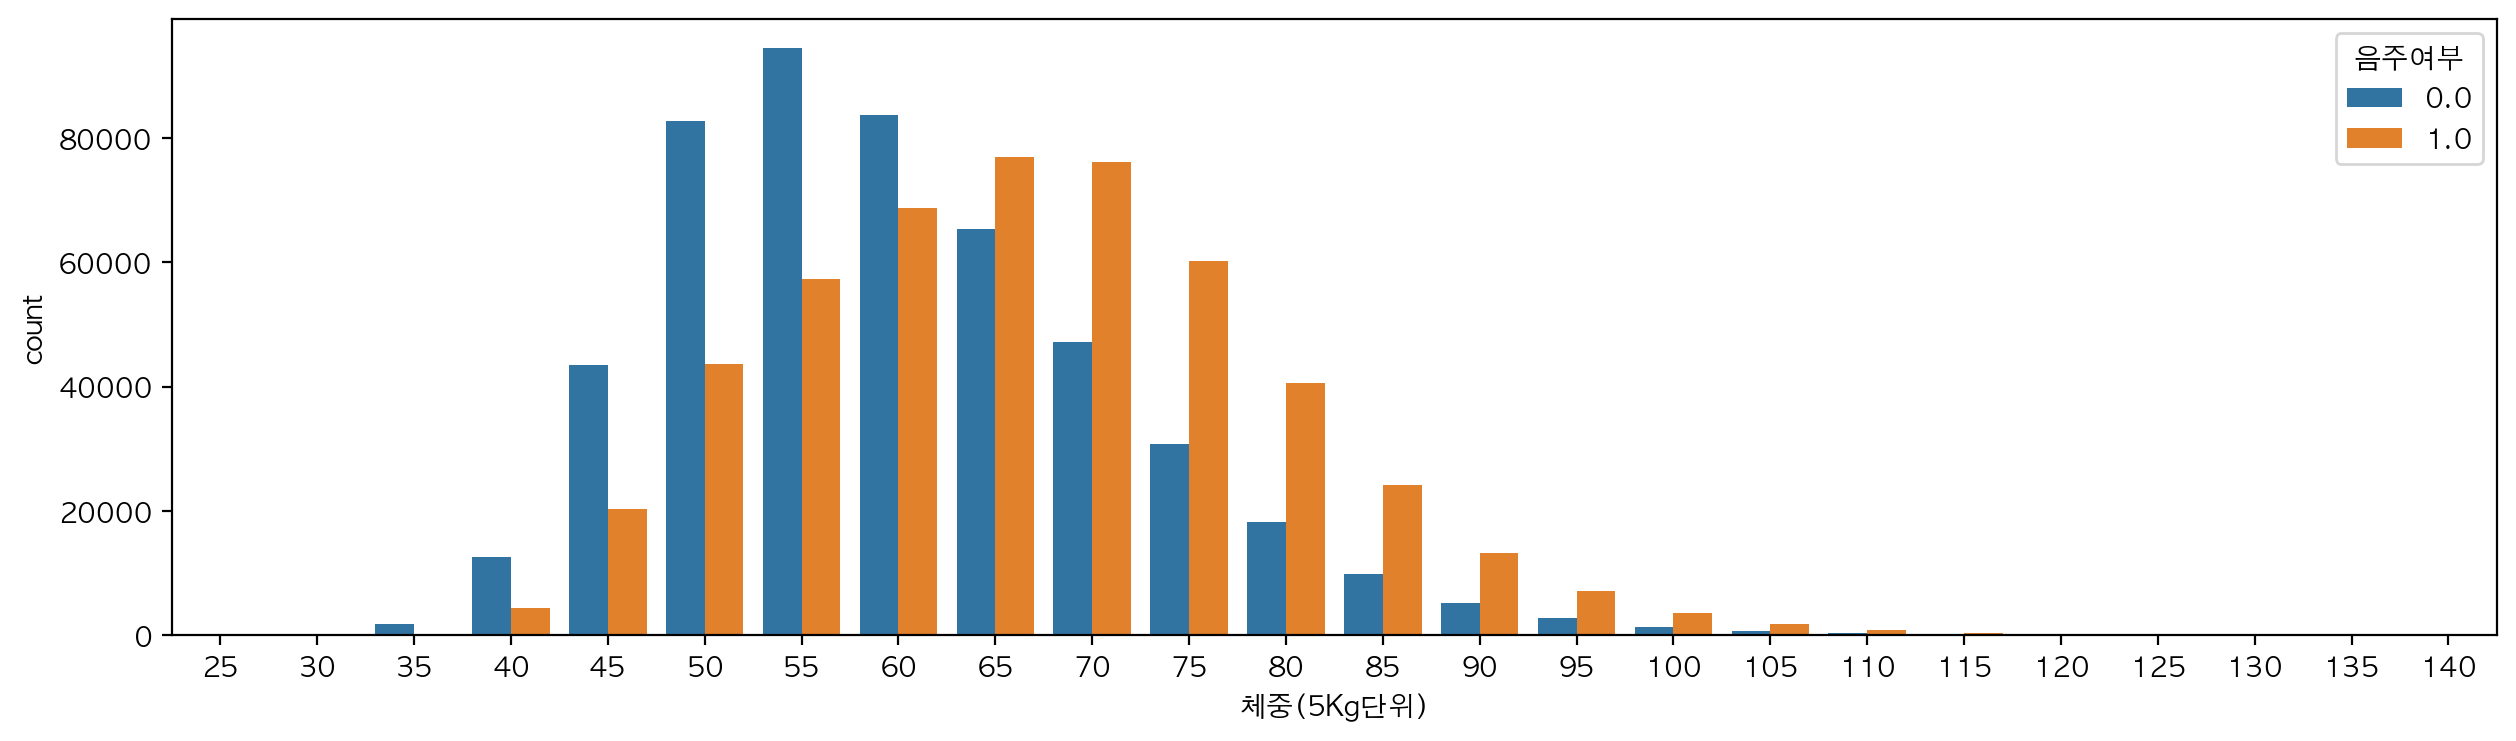

In [68]:
# 성별에 따른 체중의 차이를 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='체중(5Kg단위)', hue='음주여부')

### 14.4 barplot - 수치형 vs 범주형 데이터 시각화

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

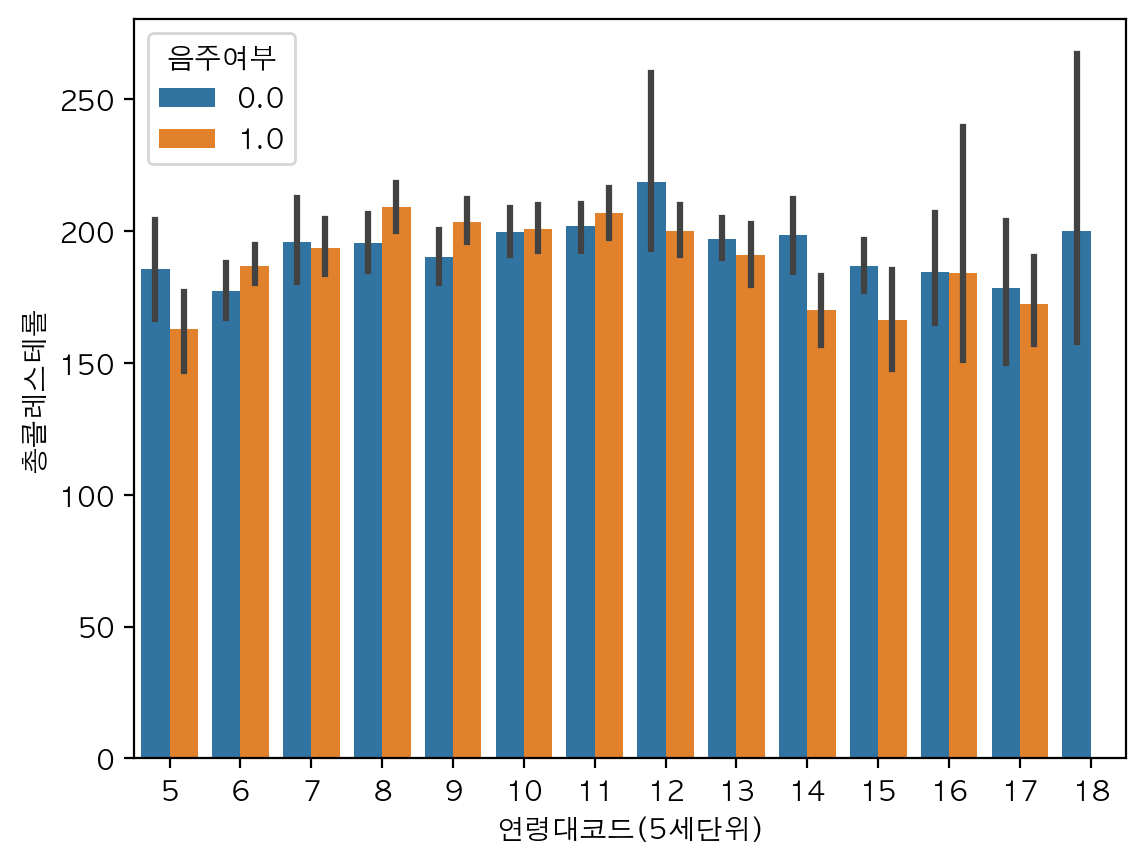

In [71]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue로 색상을 다르게 표현할 수 있습니다. 음주여부를 함께 봅니다.
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='총콜레스테롤', estimator='mean', hue='음주여부')

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

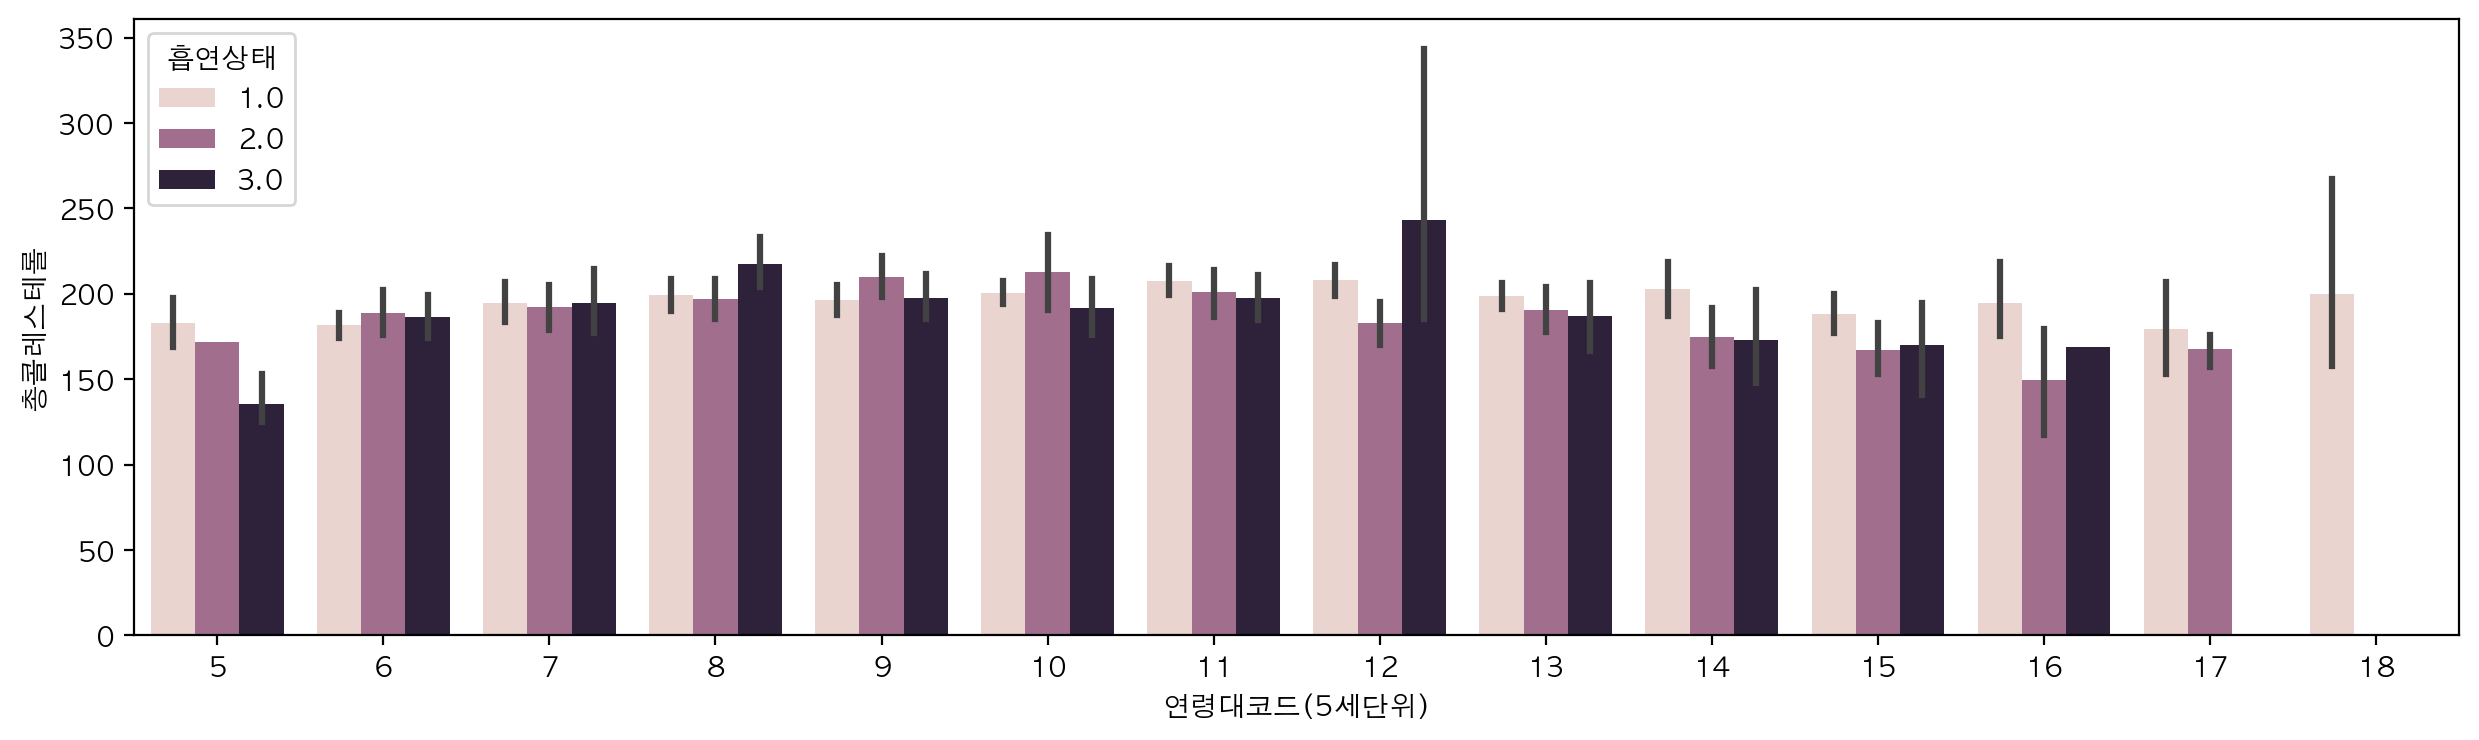

In [75]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# 콜레스테롤과 연령대코드(5세단위)를 흡연상태에 따라 barplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='총콜레스테롤', estimator='mean', hue='흡연상태')

<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

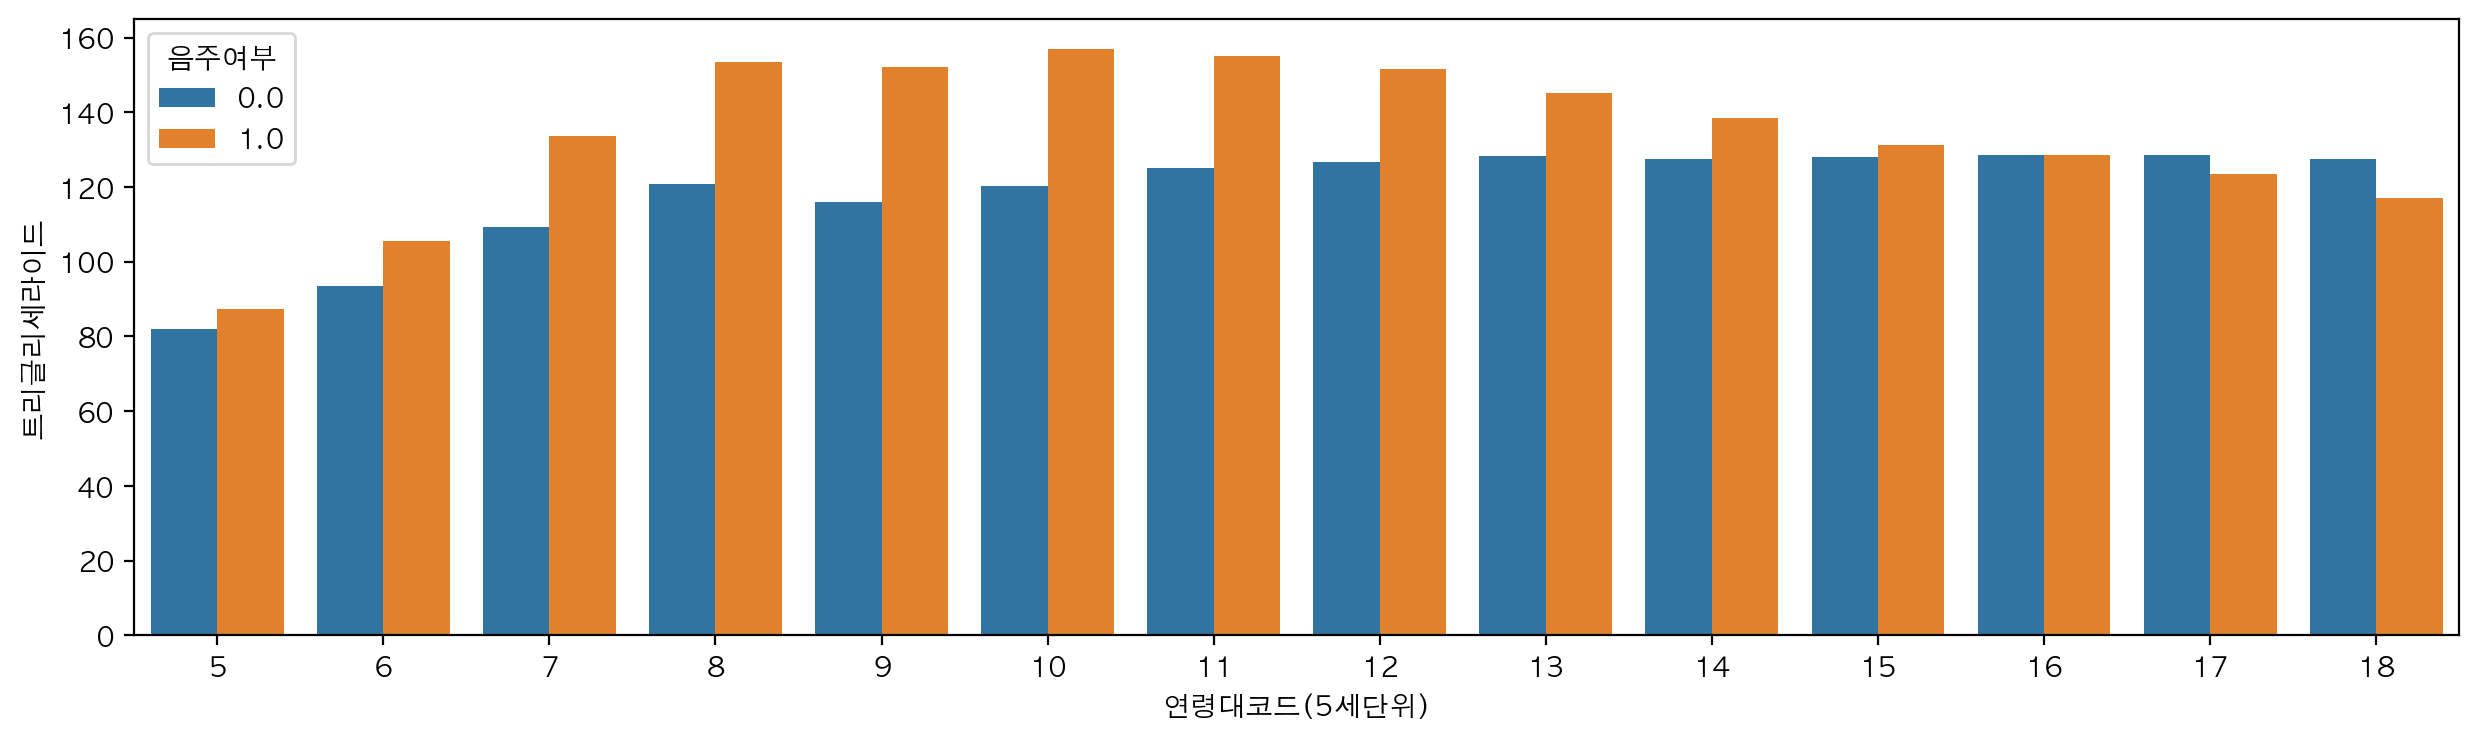

In [84]:
# 트리글리세라이드(중성지방)에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x='연령대코드(5세단위)', y='트리글리세라이드', hue='음주여부', errorbar=None)

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

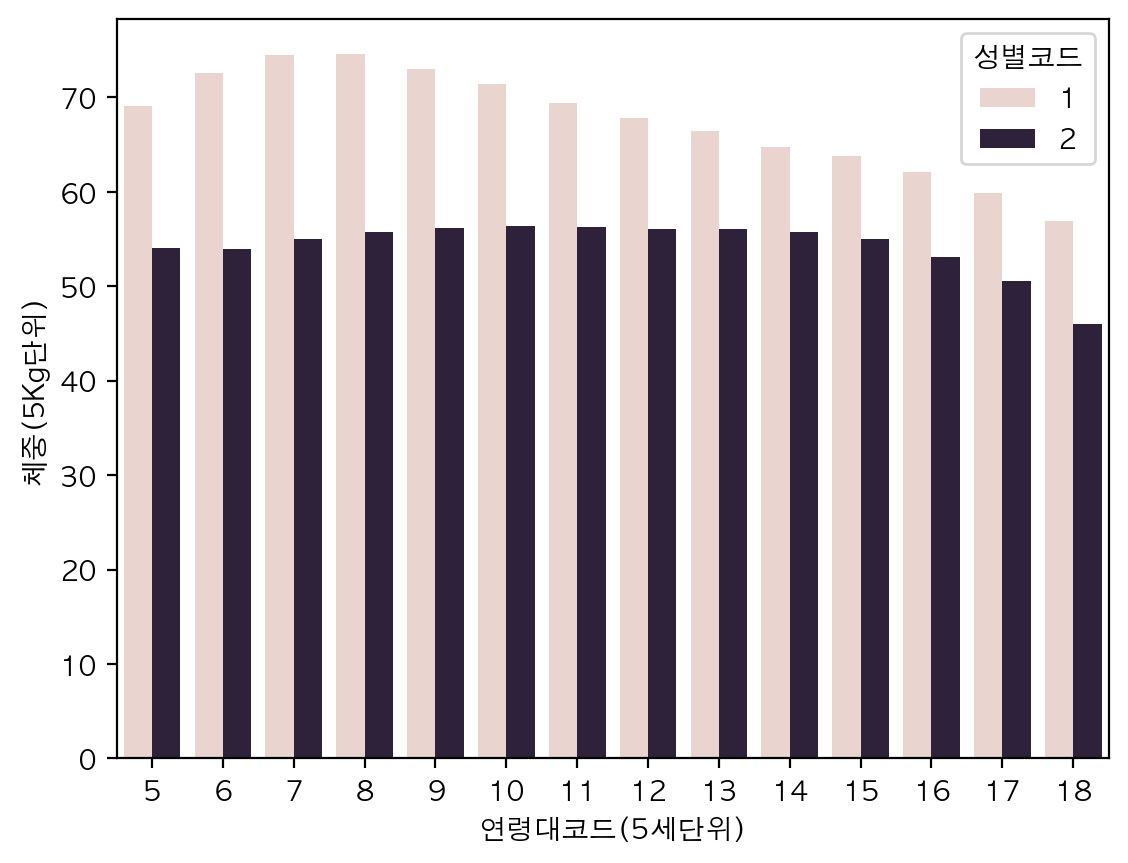

In [88]:
# 음주여부와 체중(5Kg단위)을 성별에 따라 봅니다.
sns.barplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드', errorbar=None)

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

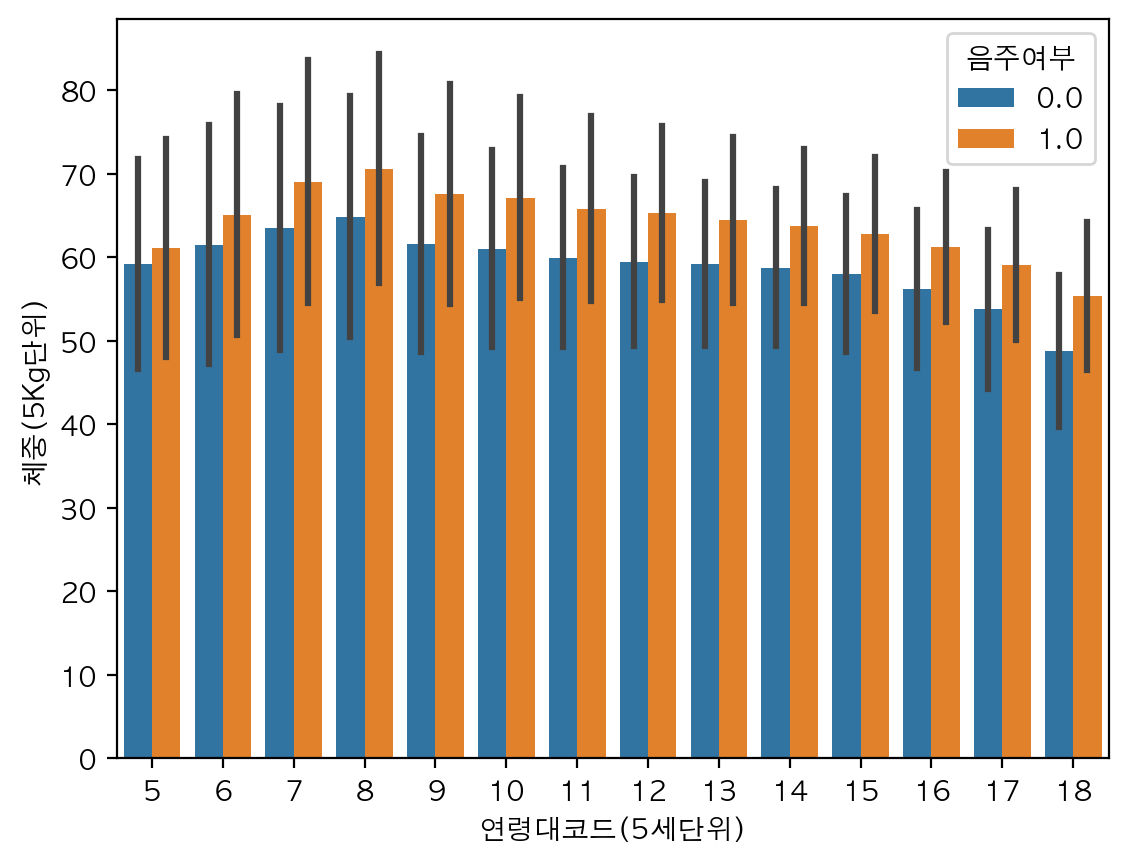

In [91]:
# 연령대코드(5세단위) 에 따른 체중(5Kg단위)을 음주여부에 따라 barplot으로 그립니다.
sns.barplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='음주여부', errorbar='sd')

### 14.5 lineplot and pointplot

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

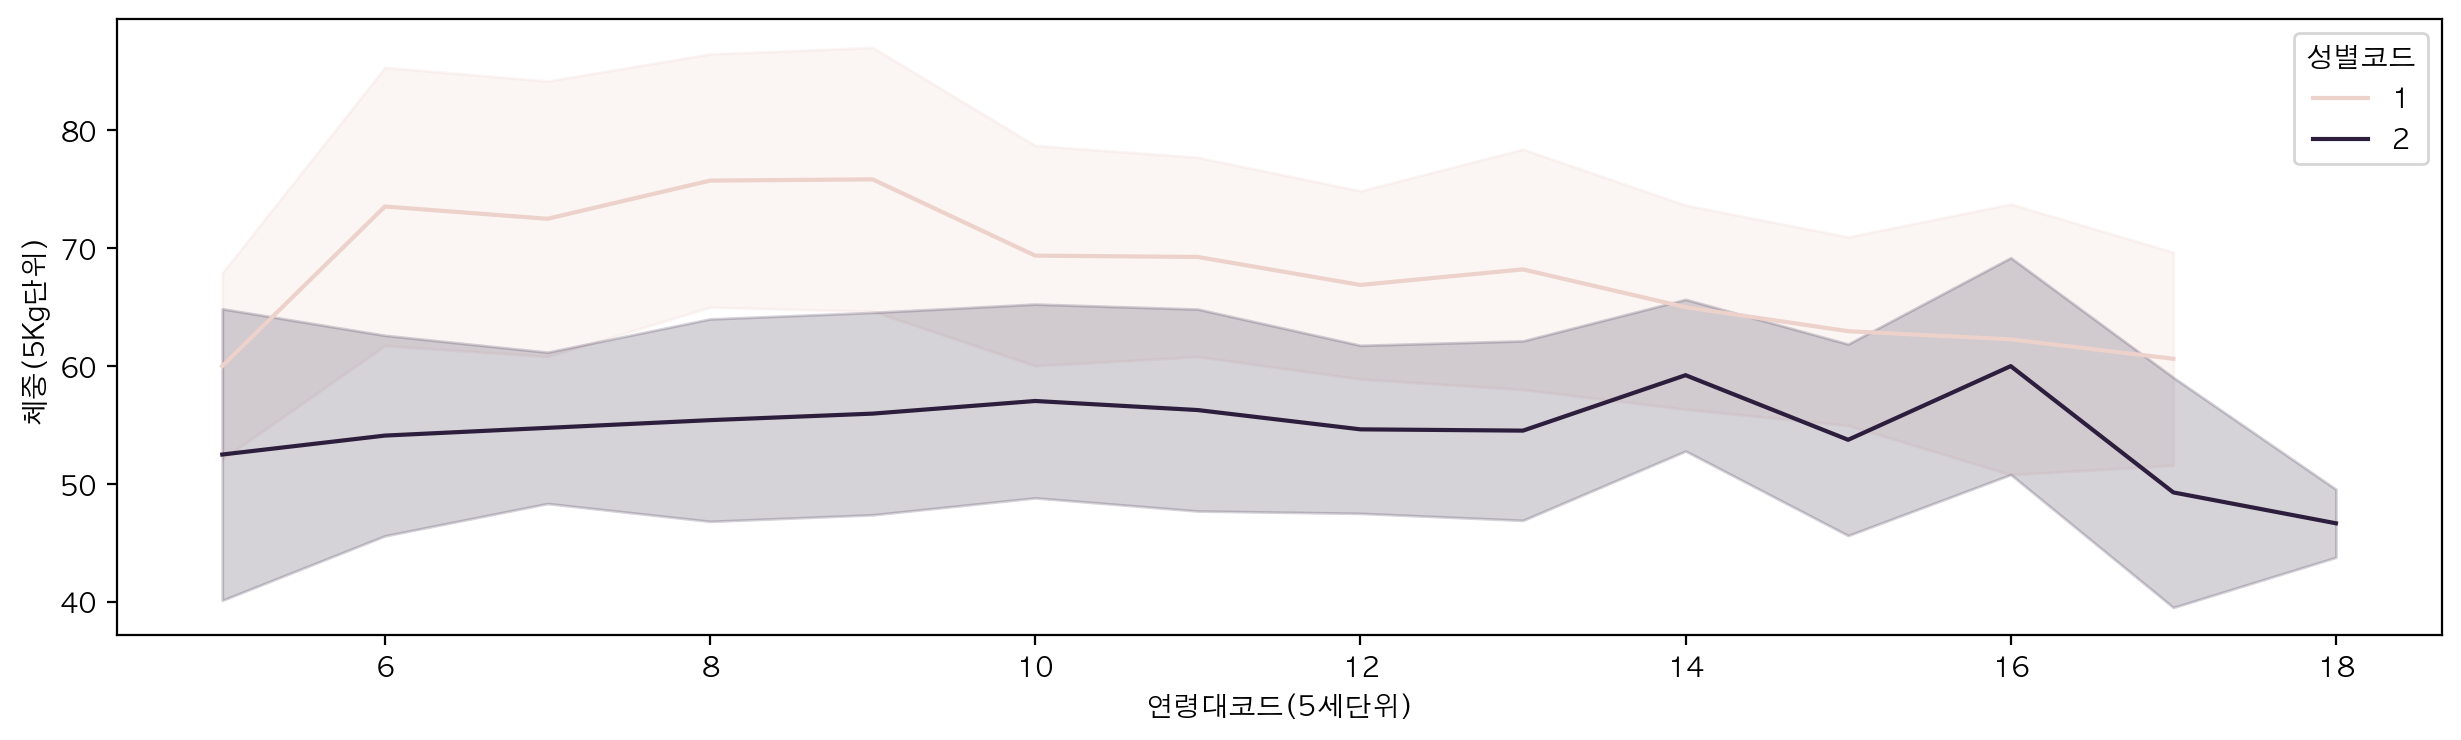

In [96]:
# 연령대코드(5세단위) 에 따른 체중(5Kg단위)을 성별코드에 따라 lineplot으로 그립니다.
# errorbar = ci
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드', errorbar='sd')

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

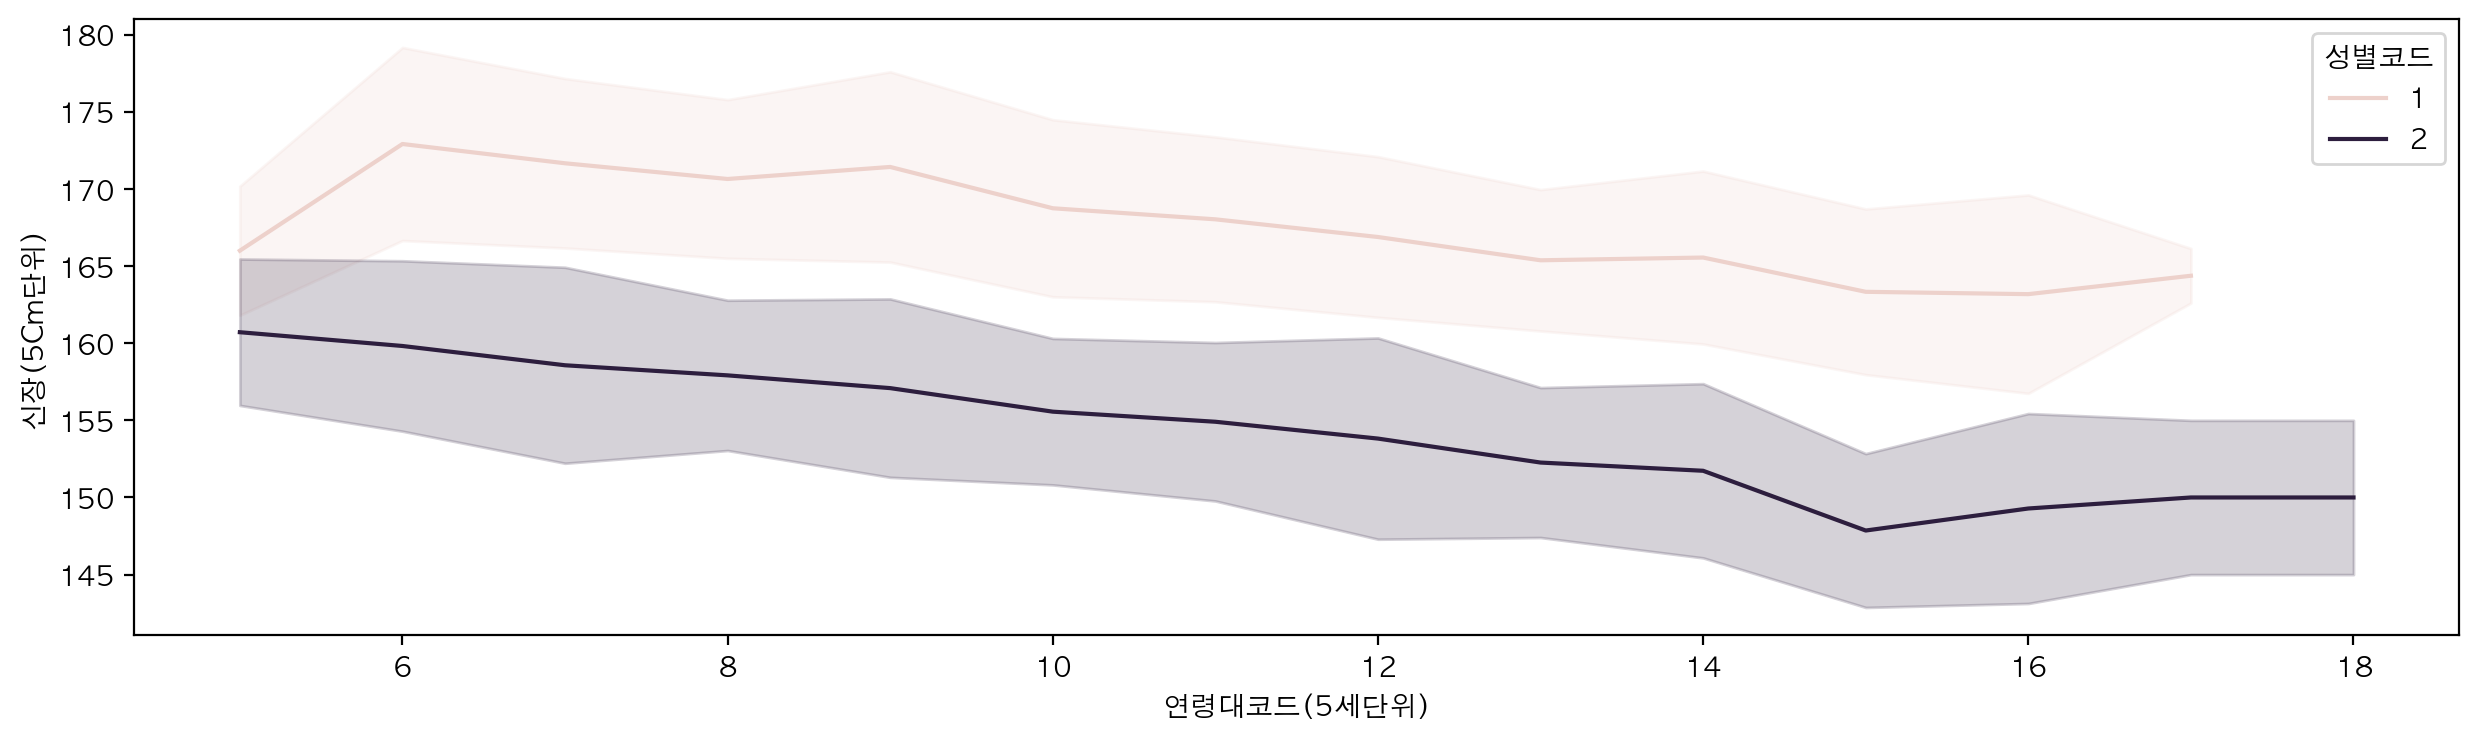

In [97]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위)을 성별코드에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='성별코드', errorbar='sd')

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

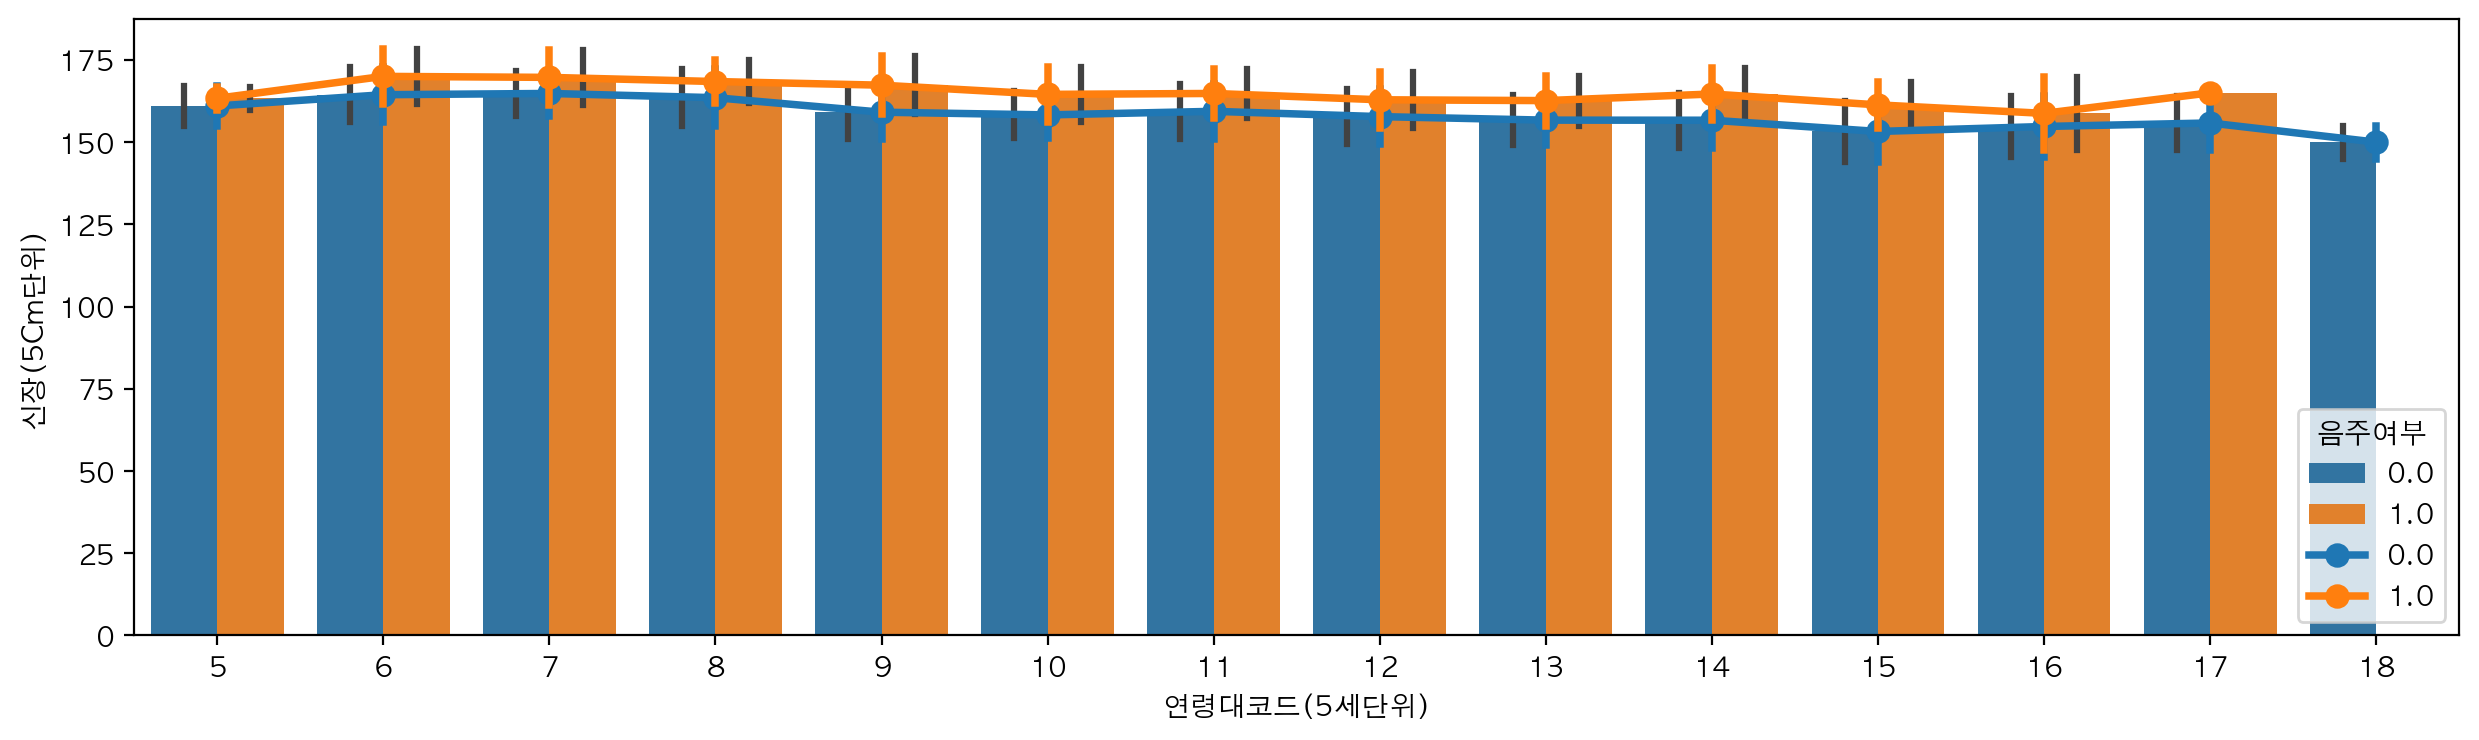

In [100]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위)을 음주여부에 따라 pointplot과 barplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', errorbar='sd')
sns.pointplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', errorbar='sd')

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

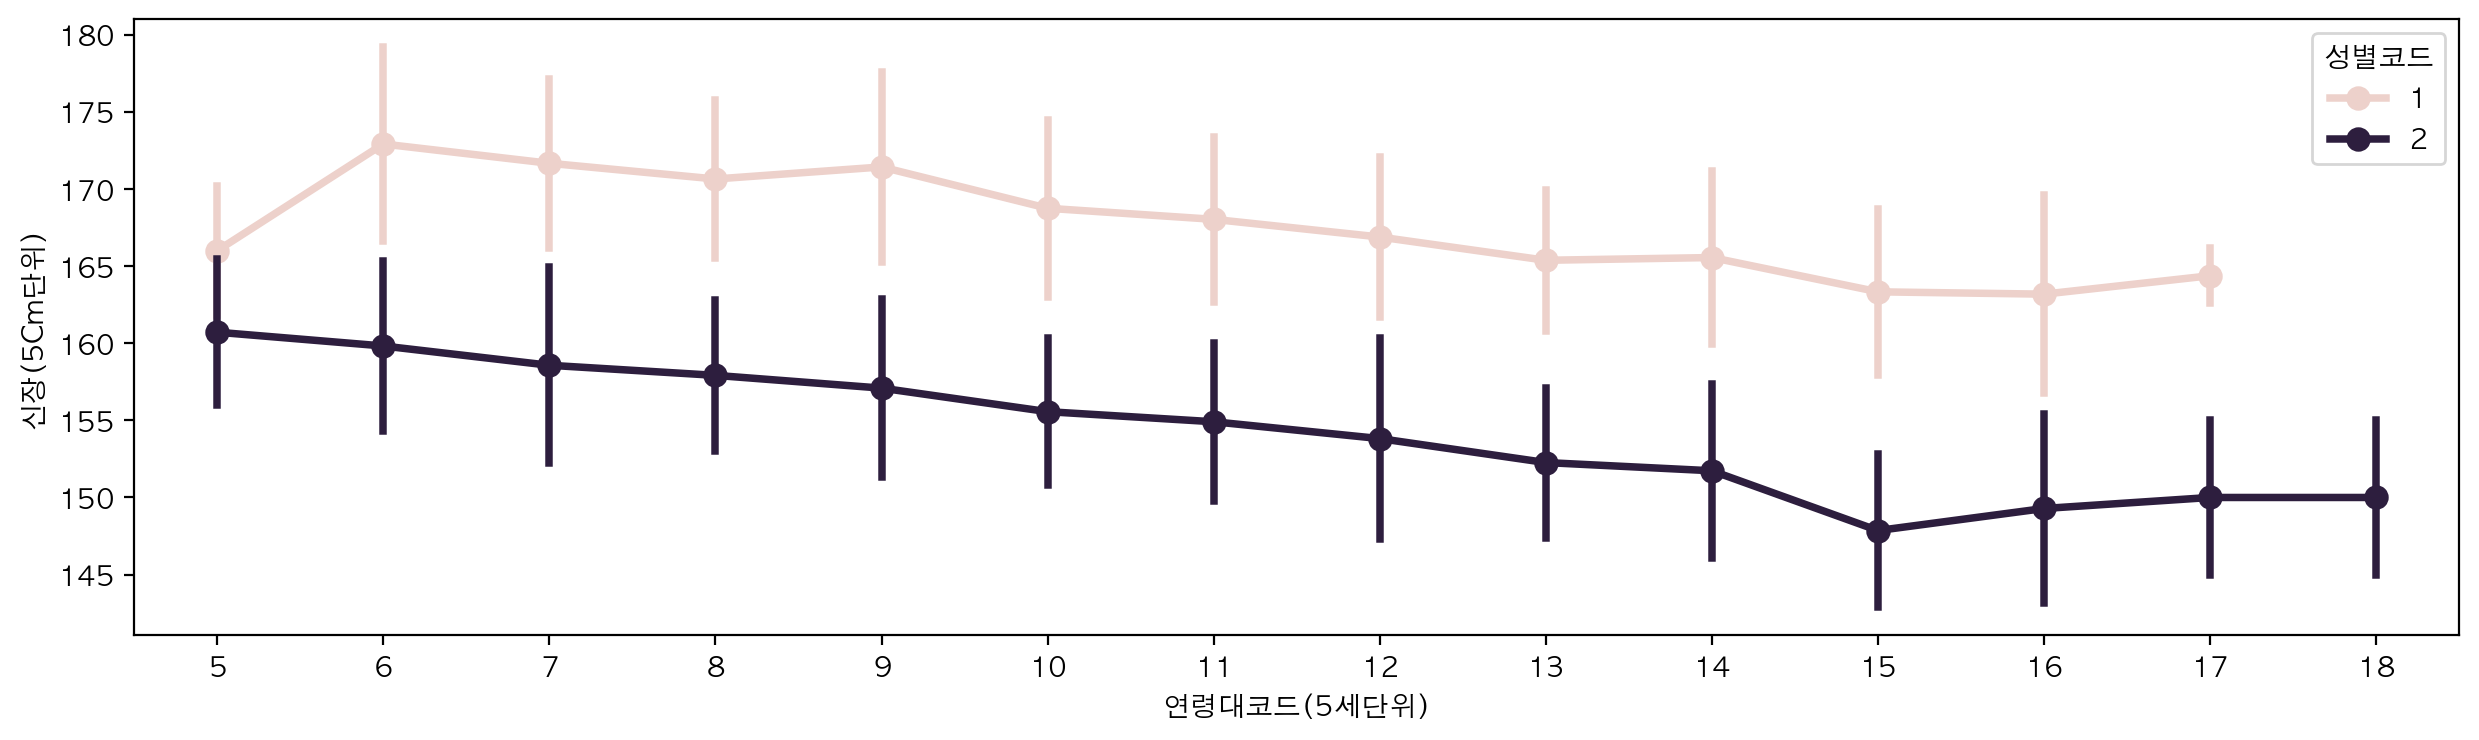

In [102]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위)을 성별코드에 따라 pointplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='성별코드', errorbar='sd')

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

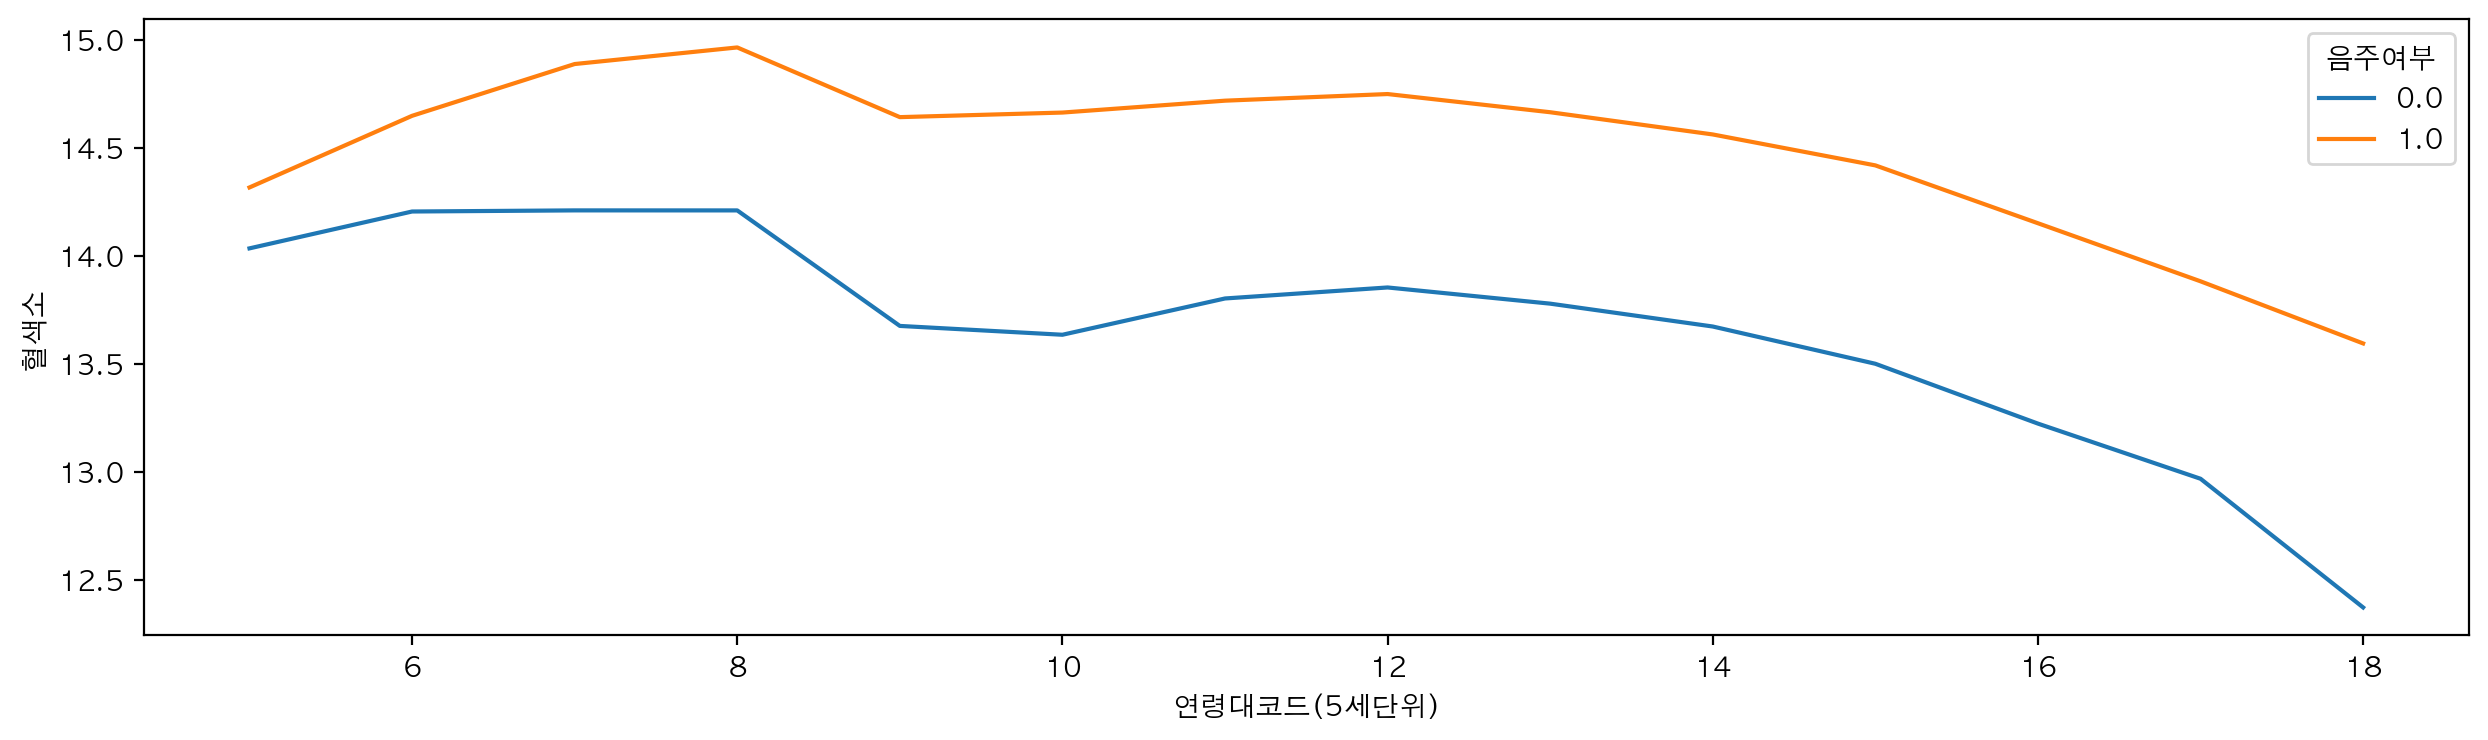

In [104]:
# 연령대코드(5세단위) 에 따른 혈색소를 음주여부에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='혈색소', hue='음주여부', errorbar=None)

### 14.6 boxplot
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
- https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC
- 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
- 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.

1. 최솟값
2. 제 1사분위수
3. 제 2사분위수(), 즉 중앙값
4. 제 3사분위수()
5. 최댓값
6. Box plot 이해하기

In [ ]:
# boxplot으로 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리며, 성별코드에 따라 다른 색상으로 표현되게 합니다.


### 14.7 violinplot

In [ ]:
# violinplot 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리며, 음주여부에 따라 다른 색상으로 표현하게 합니다.


### 14.8 swarm plot

## 15. 수치형 데이터 시각화